# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
     - This problem is crucial to solve because a significant portion of a retail bank's profits come from home loans. However, the risk of defaulters (clients who do not repay their loans) poses a substantial threat to these profits. By accurately predicting which clients are likely to default on their home equity loans, banks can make more informed decisions about approving or denying loan applications. This can help mitigate financial losses and ensure responsible lending practices. Furthermore, the use of data science and machine learning can reduce human biases in the loan approval process, making it fairer and more efficient.

### **The objective:**

 - What is the intended goal?
     - The intended goal is to build a classification model that predicts clients who are likely to default on their home equity loans. Additionally, the project aims to provide recommendations to the bank regarding important features to consider when approving a loan. In essence, the objective is to enhance the bank's loan approval process by leveraging data science to make more accurate and fair lending decisions.

### **The key questions:**

- What are the key questions that need to be answered?
    - Which features (e.g., loan amount, credit history, debt-to-income ratio) are the most important predictors of loan default?
    - How can we ensure that the model is interpretable so that we can justify loan approval or rejection decisions to clients?
    - Are there any biases in the data or model that need to be addressed to ensure fair lending practices?
    - What level of model performance can be achieved in terms of accuracy, precision, and recall for predicting loan defaults?
    - What recommendations can be made to the bank based on the model's insights to improve the loan approval process?

### **The problem formulation**:

- What is it that we are trying to solve using data science?
    - Using data science, we are trying to solve the problem of accurately predicting which loan applicants are likely to default on their home equity loans (binary classification problem). This involves leveraging historical data on loan applicants, including their financial and personal information, to build a predictive model. The model will help the bank make informed decisions about whether to approve or reject loan applications, ultimately reducing the risk of bad loans and improving the bank's profitability and responsible lending practices.
    - Overall, the project aims to harness the power of data science and machine learning to enhance the efficiency and fairness of the loan approval process while minimizing the risk of defaults.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn.preprocessing import OneHotEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [2]:
# Reading the data file
home_equity_data = pd.read_csv('hmeq.csv')

In [3]:
# Making a deep copy of the dataset to prevent changes to the original file
data = home_equity_data.copy()

In [4]:
# Viewing the first five rows of the data
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
# Viewing the last five rows of the data
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

In [6]:
# Retriveing the shape of the data
data.shape

(5960, 13)

**Observations:**

- The dataset consist of 5,960 rows and 13 columns

In [7]:
# View column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Observations:**
- There are missing values in several columns, including "MORTDUE," "VALUE," "REASON," "JOB," "YOJ," "DEROG," "DELINQ," "CLAGE," "NINQ," "CLNO," and "DEBTINC."
- The "REASON" and "JOB" columns have data type "object," while the remaining columns are of numeric data types.

In [8]:
#Check for duplicates
print(data.nunique())

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64


**Observations:**
- Binary or Categorical Columns:
    - "BAD" has 2 unique values."REASON" has more than 1 unique category."JOB" has more than 1 unique category.

- Numerical Columns with Some Variability:
    - "LOAN" has 540 unique values. "MORTDUE" has 5,053 unique values. "VALUE" has 5,381 unique values."YOJ" has 99 unique values. "DEROG" has 11 unique values."DELINQ" has 14 unique values. "CLAGE" has 5,314 unique values. "NINQ" has 16 unique values. "CLNO" has 62 unique values. "DEBTINC" has 4,693 unique values.

In [9]:
# count the number of missing (null) values in each column
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Observations:**
- Most columns have missing values. 

In [10]:
# View the percentage of missing values for each column
# Calculate the total number of missing values in each column
missing_count = data.isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = data.shape[0]

# Calculate the percentage of missing values for each column
missing_percentage = (missing_count / total_rows) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Sort the columns by missing percentage (descending order)
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)

# Display the missing information
print(missing_info)

         Missing Count  Missing Percentage
DEBTINC           1267           21.258389
DEROG              708           11.879195
DELINQ             580            9.731544
MORTDUE            518            8.691275
YOJ                515            8.640940
NINQ               510            8.557047
CLAGE              308            5.167785
JOB                279            4.681208
REASON             252            4.228188
CLNO               222            3.724832
VALUE              112            1.879195
BAD                  0            0.000000
LOAN                 0            0.000000


**Observations:**
- The dataset contains missing values across multiple columns, with varying degrees of missingness. The column 'DEBTINC' has the highest percentage of missing values at approximately 21.26%, followed by 'DEROG' at around 11.88%. Several other columns, including 'DELINQ,' 'MORTDUE,' 'YOJ,' and 'NINQ,' also have notable percentages of missing data ranging from approximately 8.64% to 9.73%. Additionally, columns such as 'CLAGE,' 'JOB,' 'REASON,' 'CLNO,' and 'VALUE' exhibit lower percentages of missing values, ranging from approximately 1.88% to 5.17%.    

In [11]:
# Statement to check for and summarize duplicates 
data.duplicated().sum()

0

**Obersvations:**
- There are no duplicates in the dataset

## Summary Statistics

In [12]:
# Convert the target variable to an object
data['BAD'] = data['BAD'].astype('object')

In [13]:
# Check data info to ensure BAD was converted from int to obj
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   object 
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 605.4+ KB


In [14]:
# Creating a statistical summary for numericals
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Observations:
- **Numerical**
    - **LOAN:**
        - The loans in the dataset range from a minimum of 1,100 to a maximum of 89,900.
        - The average loan amount is approximately 18,608, with a standard deviation of approximately 11,207. This indicates significant variability in loan amounts.

    - **MORTDUE:**
        - The amount due on existing mortgages varies widely, with a minimum of 2,063 and a maximum of 399,550.
        - The average mortgage due is approximately 73,761, with a standard deviation of approximately 44,457. This suggests considerable variability in mortgage amounts.

    - **VALUE:**
        - The current property values range from 8,000 to 855,909.
        - The average property value is approximately 101,776, with a standard deviation of approximately 57,386. This indicates significant variation in property values.

     - **YOJ (Years at Present Job):**
          - The number of years at the current job ranges from 0 to 41 years.
          - On average, applicants have spent approximately 8.92 years at their current jobs.

     - **DEROG (Number of Major Derogatory Reports):**
          - Most applicants have no major derogatory reports, as indicated by the lower quartile (25th percentile) value of 0.
          - The maximum number of derogatory reports for an applicant is 10.

     - **DELINQ (Number of Delinquent Credit Lines):**
          - Similar to DEROG, many applicants have no delinquent credit lines, with the lower quartile value of 0.
          - The maximum number of delinquent credit lines for an applicant is 15.

     - **CLAGE (Age of Oldest Credit Line in Months):**
          **- The age of the oldest credit line varies from 0 months to 1,168.23 months (nearly 97 years).**
          - The average age of the oldest credit line is approximately 179.77 months, with a standard deviation of approximately 85.81 months.

     - **NINQ (Number of Recent Credit Inquiries):**
          - Most applicants have either no recent credit inquiries (lower quartile value of 0) or very few.
          - The maximum number of recent credit inquiries for an applicant is 17.

     - **CLNO (Number of Existing Credit Lines):**
          - The number of existing credit lines varies from 0 to 71.
          - On average, applicants have approximately 21.30 existing credit lines.

    - **DEBTINC (Debt-to-Income Ratio):**
        - The debt-to-income ratio ranges from 0.52 to 203.31.
        - The average debt-to-income ratio is approximately 33.78, with a standard deviation of approximately 8.60.

In [15]:
# Creating a statistical summary for categoricals
data.describe(include=['object']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Observations:**
- **Categorical**
    - **BAD:**
        - It is a binary categorical variable with two unique values: 0 and 1.
        = The most frequent value is 0, indicating that the majority of applicants in the dataset have repaid their loans (4,771 instances).

    - **REASON:**
        - The "REASON" column represents the reason for the loan request, with two unique categories.
        - The most frequent reason for a loan request is "DebtCon" (Debt Consolidation), which occurs 3,928 times in the dataset.

    - **JOB:**
        - There are six unique job categories.
        - The most frequent job category is "Other," which appears 2,388 times in the dataset.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


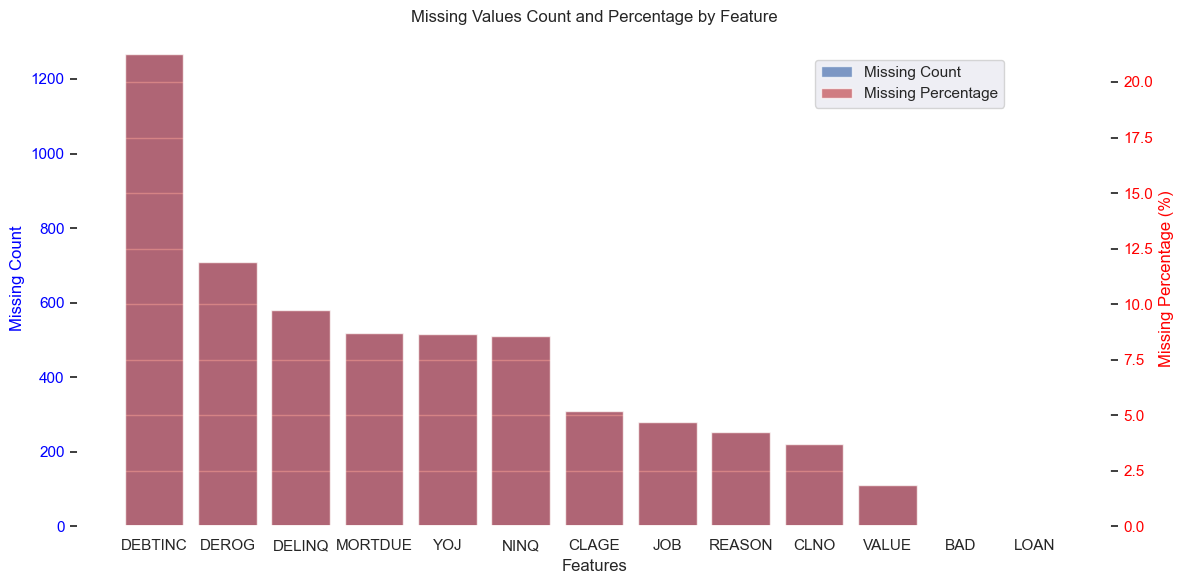

In [16]:
#Plot missing values for further obervation

# Create a dual-axis bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

#Set the background to white
ax1.set_facecolor('white')

# Bar chart for missing count
ax1.bar(missing_info.index, missing_info['Missing Count'], color='b', alpha=0.7, label='Missing Count')
ax1.set_xlabel('Features')
ax1.set_ylabel('Missing Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Twin the x-axis for the second bar chart
ax2 = ax1.twinx()

# Bar chart for missing percentage
ax2.bar(missing_info.index, missing_info['Missing Percentage'], color='r', alpha=0.7, label='Missing Percentage')
ax2.set_ylabel('Missing Percentage (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Features')

# Display the legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.9))

# Show the plot
plt.title('Missing Values Count and Percentage by Feature')
plt.tight_layout()
plt.show()



In [17]:
def univariate_analysis(data, column_name):
    """
    Perform univariate analysis on a specified column of a DataFrame.

    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.

    Returns:
    - None (displays plots).
    """
    # Set up subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

    # Histogram
    sns.histplot(data=data, x=column_name, ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram of {column_name}')
    axes[0].axvline(data[column_name].mean(), color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    axes[0].axvline(data[column_name].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
    axes[0].legend()

    # Box plot
    sns.boxplot(data=data, x=column_name, ax=axes[1])
    axes[1].set_title(f'Box Plot of {column_name}')
    axes[1].axvline(data[column_name].mean(), color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    axes[1].axvline(data[column_name].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
    axes[1].legend()
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    

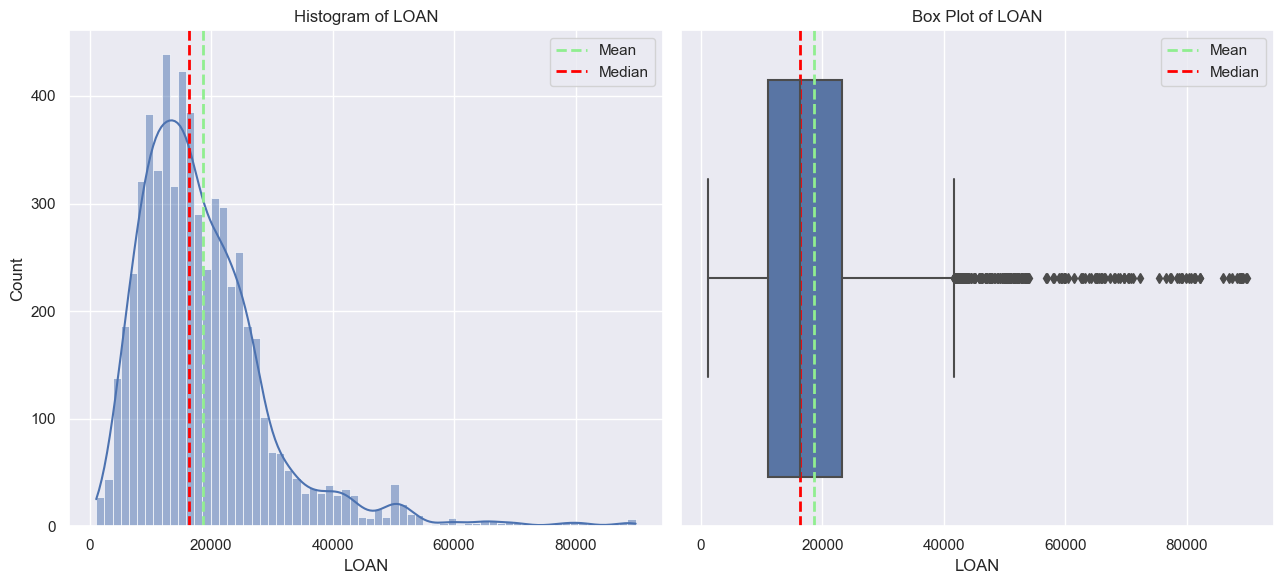

In [18]:
univariate_analysis(data, 'LOAN')

**Observations:**
- The histogram is positively skewed distribution, with a longer tail on the right.
- While most loan amounts are concentrated in the lower range, there are some outliers with substantially higher loan amounts, indicating that a few borrowers have been approved for larger loans.

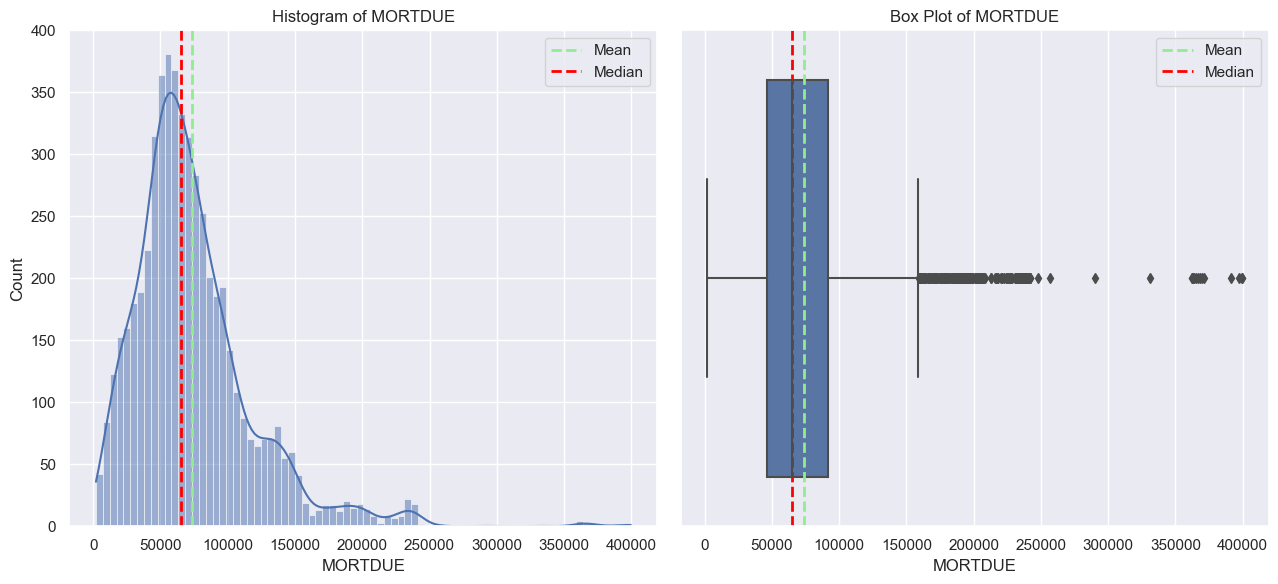

In [19]:
univariate_analysis(data, 'MORTDUE')

**Observations:**
 - The peak of the histogram is around 73,000.
 - The distribution appears to be positively skewed, with a few outliers on the higher end. This suggests that the majority of borrowers have relatively lower mortgage amounts, but there are some instances where borrowers have higher mortgage balances, possibly due to larger or more expensive properties.

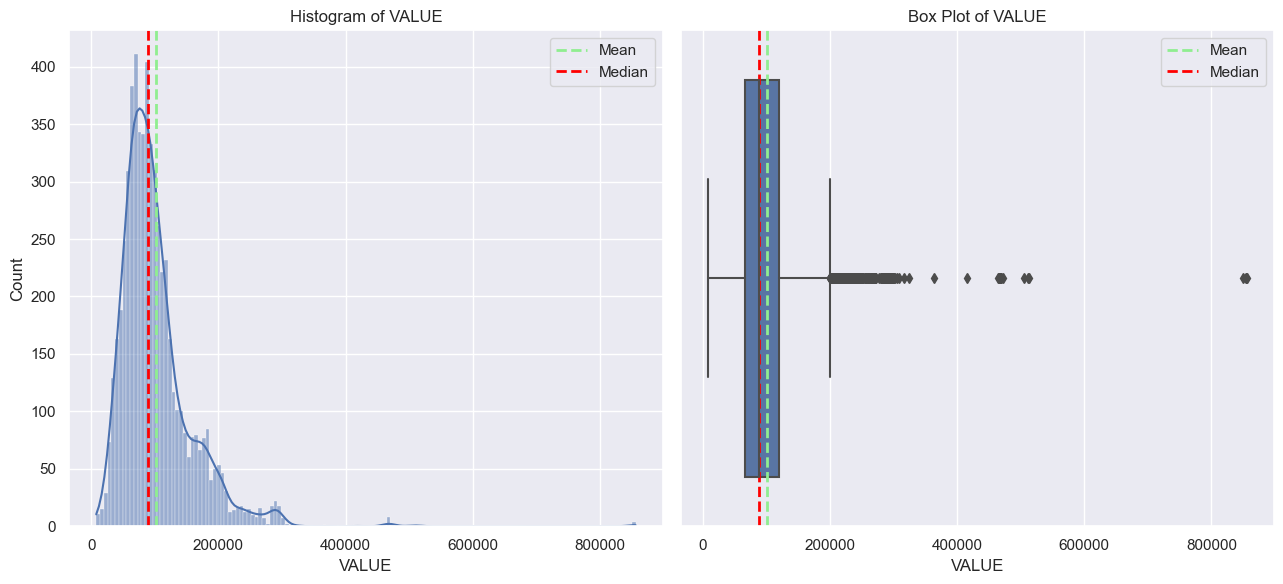

In [20]:
univariate_analysis(data, 'VALUE')

**Observatios:**
- The distribution appears to be positively skewed, with some properties having much higher values than the majority. This suggests that the properties vary significantly in terms of their assessed values, with some being considerably more valuable than others.

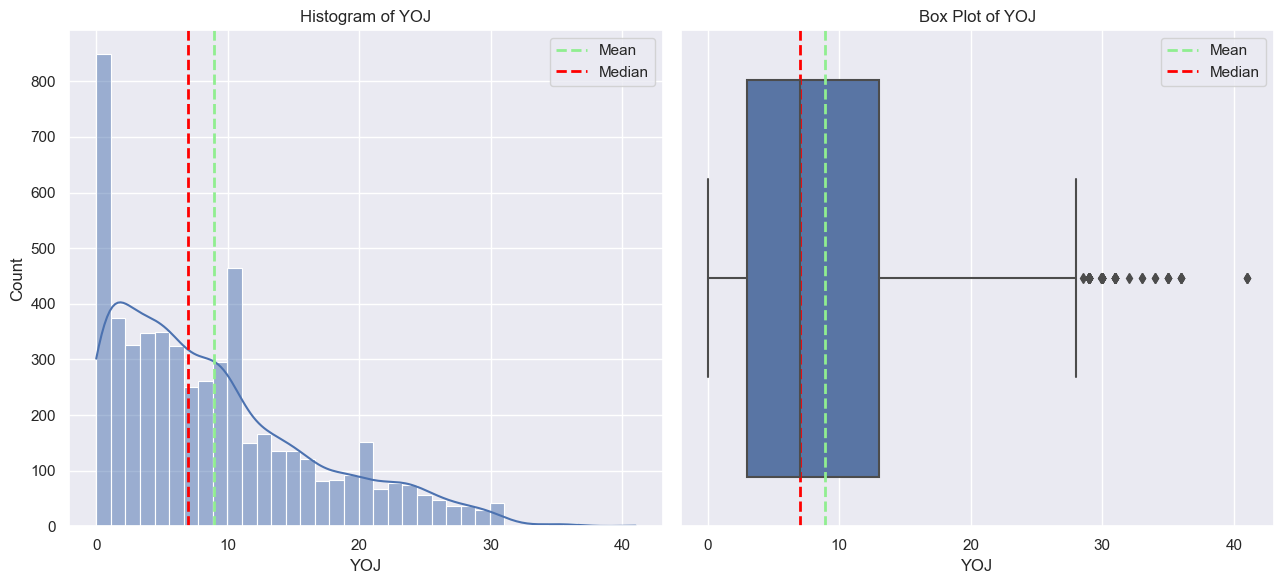

In [21]:
univariate_analysis(data, 'YOJ')

**Observations:**
- There is a notable presence of individuals with less than 5 years at their current job, indicating that a significant portion of loan holders are relatively new in their current employment. However, there are also individuals with longer tenures, with the maximum value reaching 41 years.

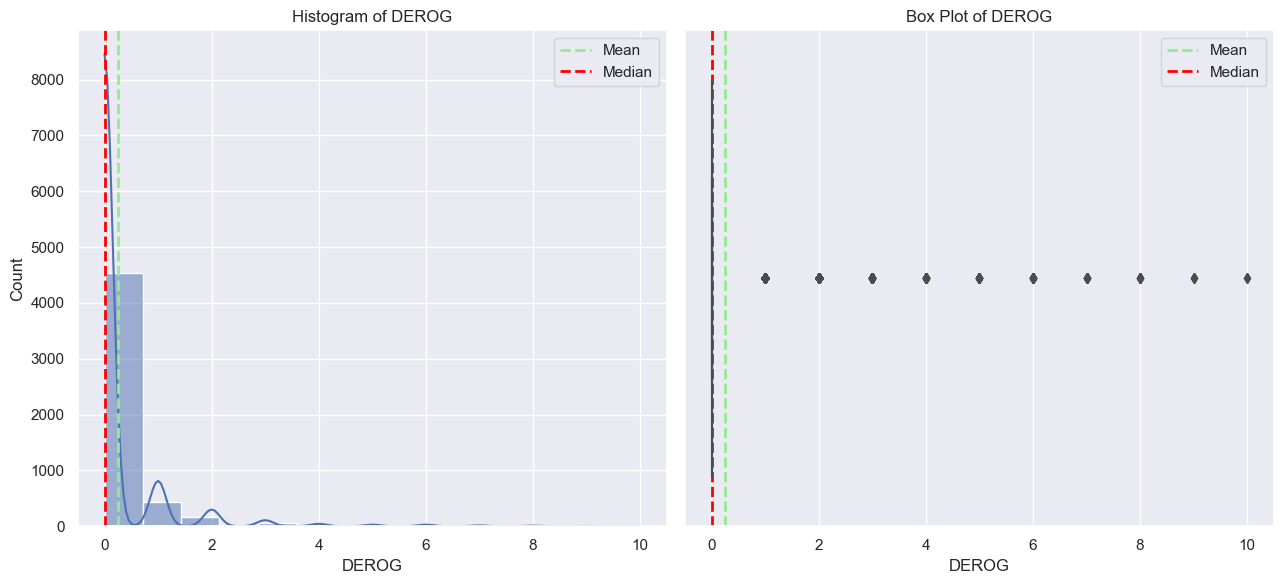

In [22]:
univariate_analysis(data, 'DEROG')

**Observations:**
  - The majority of loan holders have no major derogatory reports, but there are some with a few reports.

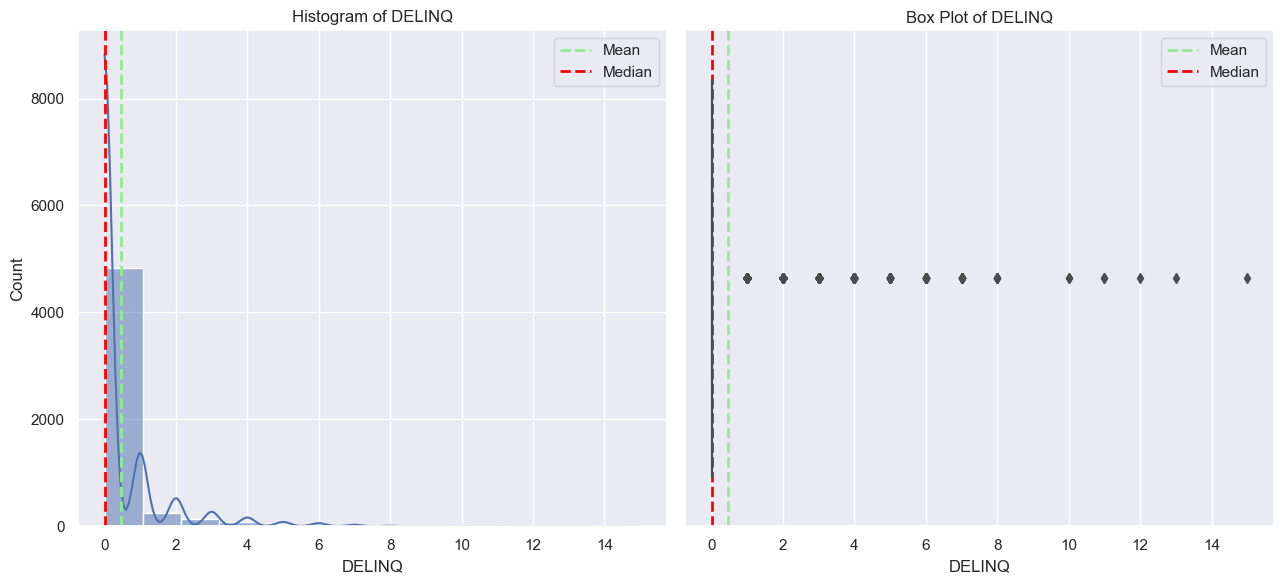

In [23]:
univariate_analysis(data, 'DELINQ')

**Observations:**
- Most loan holders have no delinquent credit lines, while there are a few who have some delinquent credit lines.  

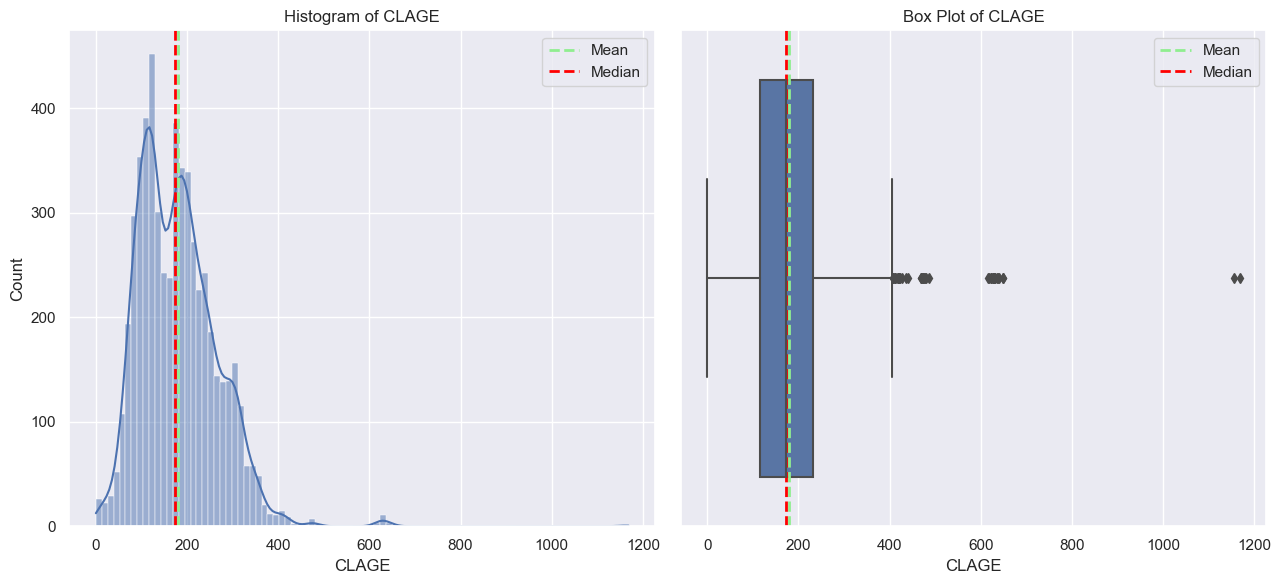

In [24]:
univariate_analysis(data, 'CLAGE')

**Observations:**
- The age of the oldest credit line varies widely, with a significant number of credit lines being relatively young (around 100 months or less) and some being quite old (over 200 months).

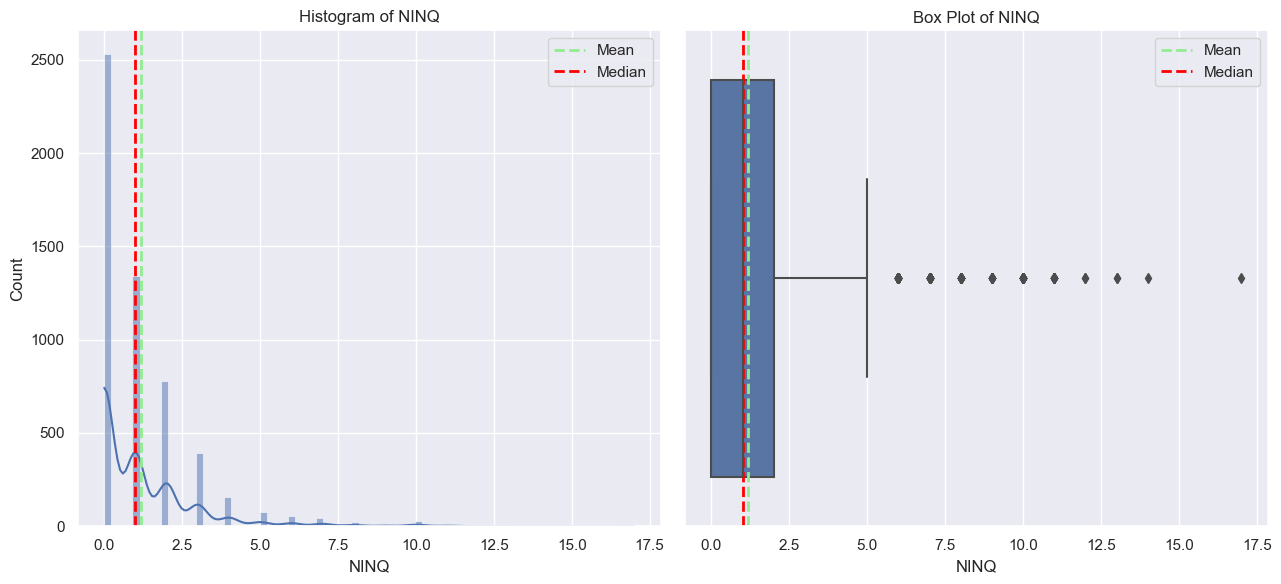

In [25]:
univariate_analysis(data, 'NINQ')

**Observations:**
- The number of recent credit inquiries varies among loan holders, with a majority having either zero or one recent credit inquiry, while a smaller number have higher numbers of recent inquiries, ranging up to 17.

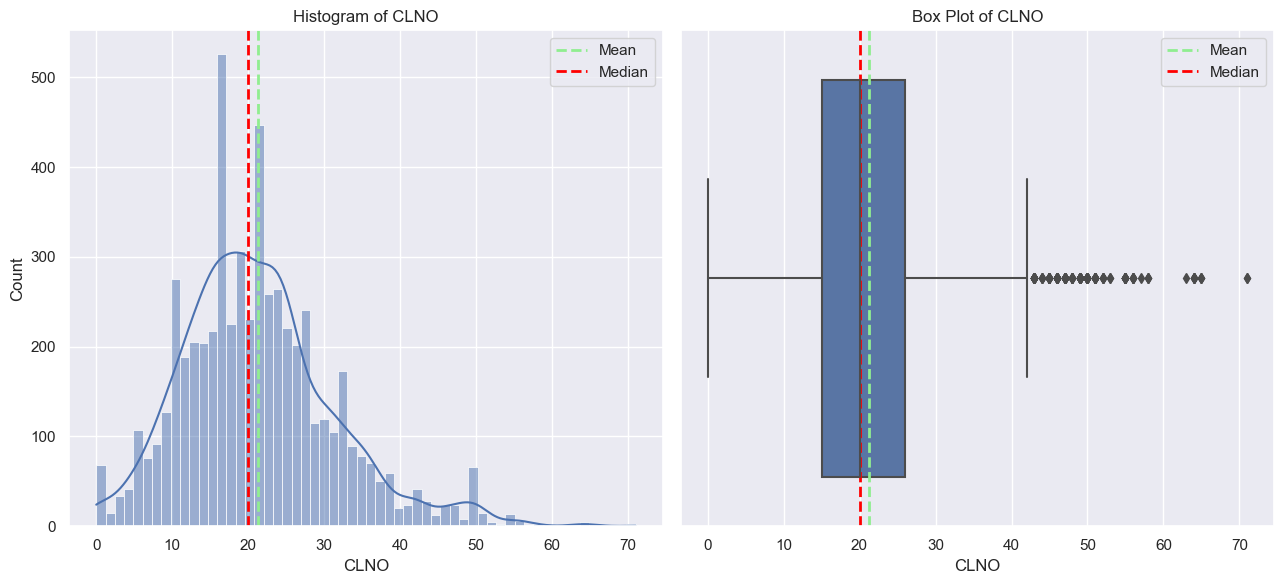

In [26]:
univariate_analysis(data, 'CLNO')

**Observations:**
- The number of existing credit lines varies among loan holders, with a median value of 20 credit lines. 
- The distribution is positively skewed, with some loan holders having fewer credit lines (as low as 0), while others have more (up to 71 credit lines).

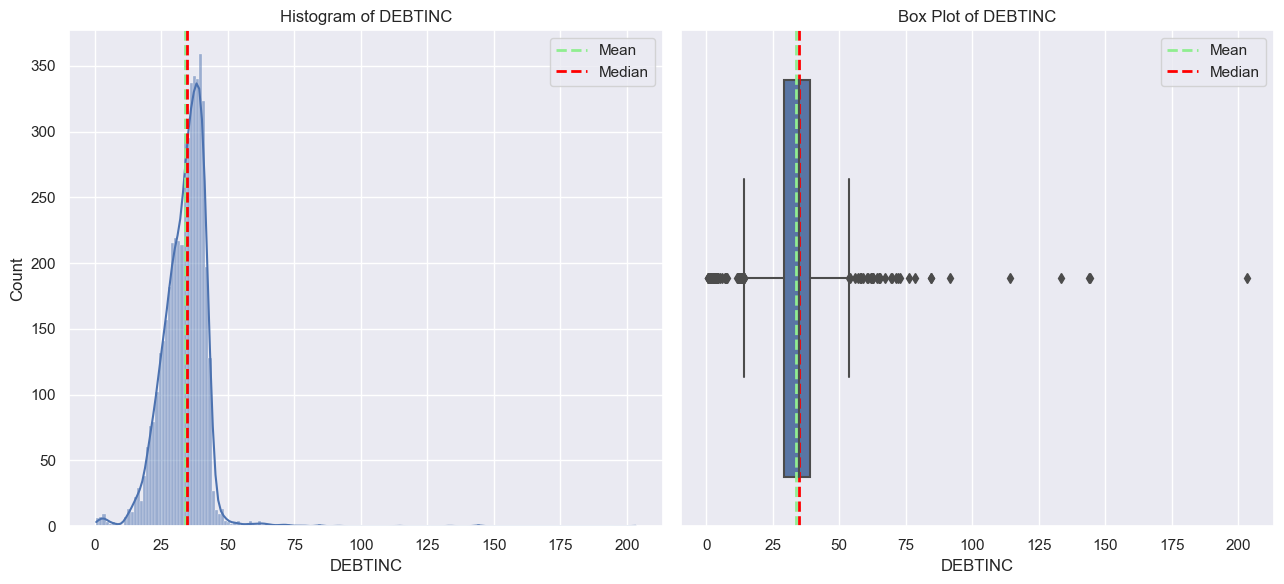

In [27]:
univariate_analysis(data, 'DEBTINC')

**Observations:**
- The debt-to-income ratio (DEBTINC) among loan holders shows a wide range of values, with a median ratio of approximately 34.82%. This suggests that, on average, loan holders have monthly debt payments that account for around 34.82% of their gross monthly income. 
- The distribution is slightly negatively skewed, indicating that a majority of loan holders have a moderate debt-to-income ratio, but there are some outliers with exceptionally high ratios, which could potentially pose a risk.

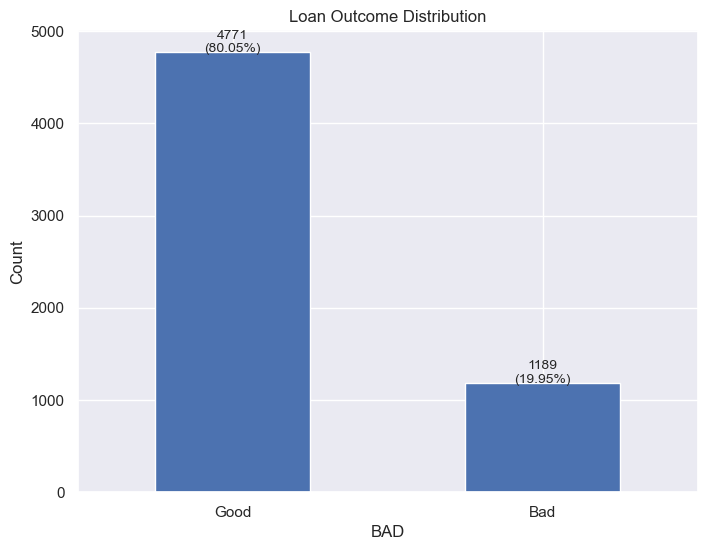

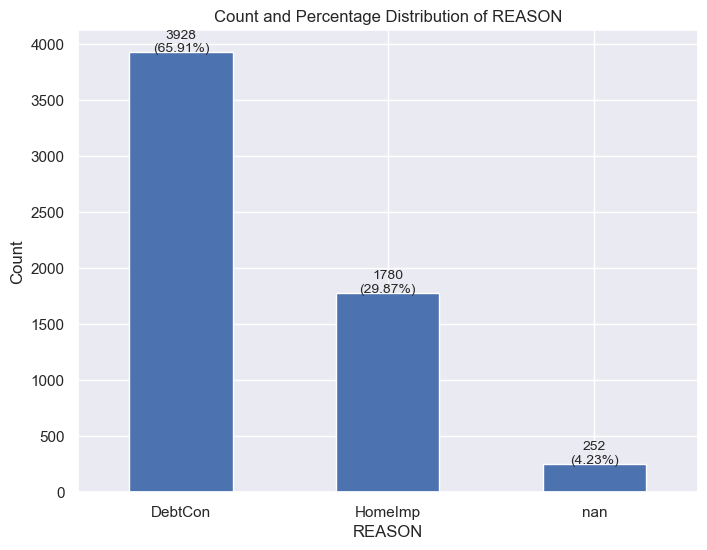

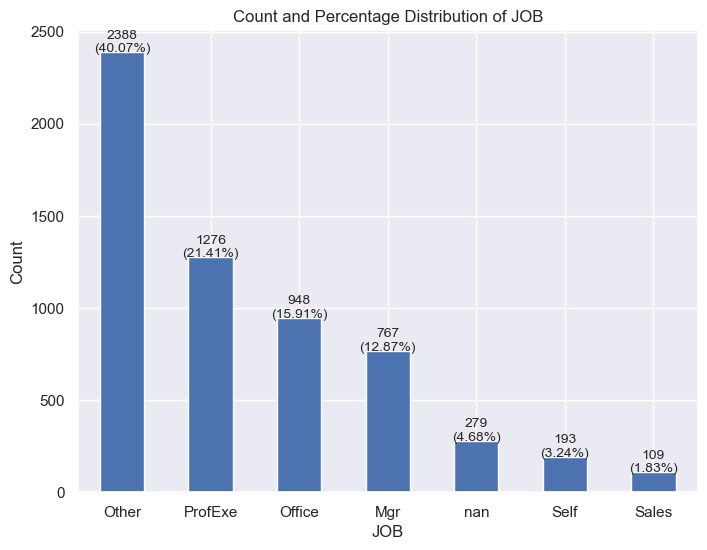

In [28]:
def univariate_categorical_analysis(data, column, show_percentage=True):
    # Replace various representations of missing values with NaN
    data[column].replace(['nan', 'Nan', 'Blank'], np.nan, inplace=True)

    # Calculate value counts, including NaN
    value_counts = data[column].value_counts(dropna=False)

    # Plot the counts
    plt.figure(figsize=(8, 6))
    ax = value_counts.plot(kind='bar', rot=45)
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Customize the title based on the column
    if column == 'BAD':
        ax.set_title('Loan Outcome Distribution')
    else:
        ax.set_title(f'Count and Percentage Distribution of {column}')

    ax.set_xticklabels(value_counts.index, rotation=0)

    # Adds class counts on the bars
    if column == 'BAD':
        ax.set_xticklabels(['Good', 'Bad'], rotation=0)

    if show_percentage:
        total = len(data)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}\n({height / total:.2%})', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', fontsize=10)
    else:
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12)

# Example usage:
categorical_columns = ['BAD', 'REASON', 'JOB']
for column in categorical_columns:
    univariate_categorical_analysis(data, column)

plt.show()


**Observations:**
- **Count and Percentage distribution of BAD** 
    - There is an imbalance, with a significantly higher number of instances in class 0 (Loan Repaid) compared to class 1 (Defaulted on Loan).
    
- **Count and Percentage distribution of REASON** 
    - "DebtCon" (Debt Consolidation) is the most common reason among loan applicants, indicating that a significant portion of clients applied for loans to consolidate their debts.
    - A substantial but smaller proportion of clients applied for loans to fund home improvement projects.
    - There is a relatively small number missing or unknown reasons clients applied for loans.
    
- **Count and Percentage distribution of JOB** 
    - A significant portion of clients either did not specify their occupation or have job roles categorized as "Other."
    - A substantial proportion of loan applicants hold professional or executive positions.
    - There is missing or unknown job information for approximately 4.68% of the total.

### **Bivariate Analysis**

In [29]:
def visualize_numerical_categorical_relationship(data, numerical_column, categorical_column):
    """
    Visualizes the relationship between a numerical variable and a categorical variable using a box plot with annotations.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        numerical_column (str): The name of the numerical column.
        categorical_column (str): The name of the categorical column.

    Returns:
        None (displays the plot).
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(f'Relationship between {categorical_column} and {numerical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)
    
    # Add annotations (numbers) to the box plot
    for cat in data[categorical_column].unique():
        box_data = data[data[categorical_column] == cat][numerical_column]
        y_pos = box_data.median() + 0.5  # Adjust the vertical position of the annotation
        plt.text(data[categorical_column].unique().tolist().index(cat), y_pos,
                 f'Median: {box_data.median():.2f}\nCount: {box_data.count()}', 
                 ha='center', va='center', fontsize=10, color='black', bbox=dict(facecolor='white', alpha=0.5))

    plt.show()


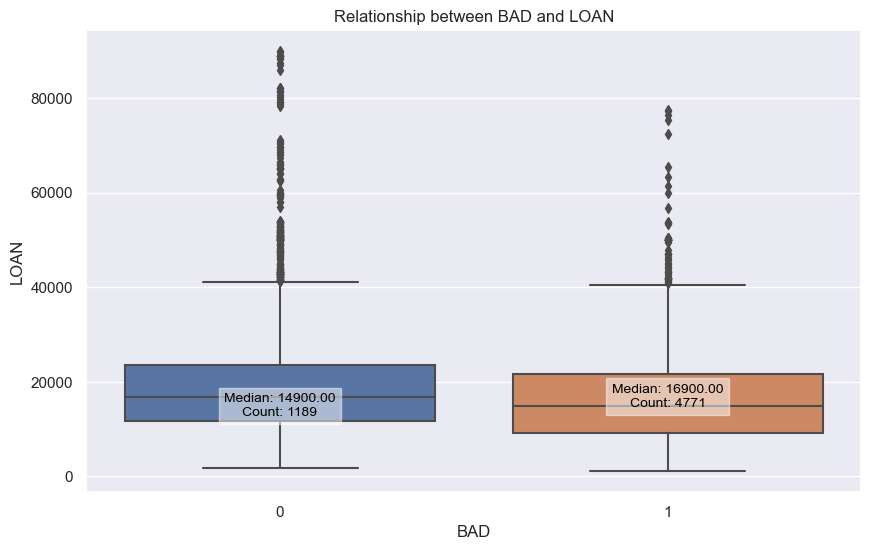

In [30]:
visualize_numerical_categorical_relationship(data, 'LOAN', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median "LOAN" amount is $14,900, and there are 1,189 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median "LOAN" amount is $16,900, and there are 4,771 cases in this category.
- These insights suggest that, on average, clients who defaulted on loans tend to have slightly higher loan amounts compared to clients who repaid their loans.

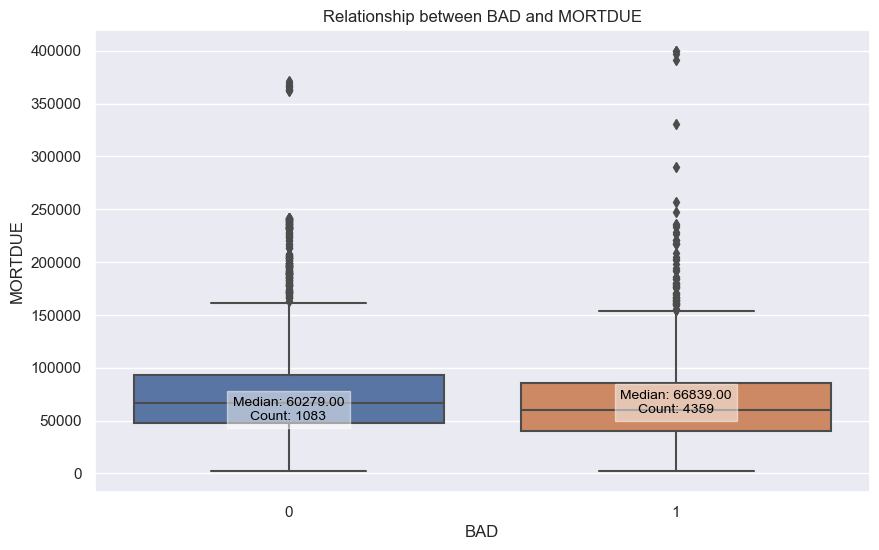

In [31]:
visualize_numerical_categorical_relationship(data, 'MORTDUE', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median "MORTDUE" amount is approximately $60,279, and there are 1,083 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median "MORTDUE" amount is approximately $66,839, and there are 4,359 cases in this category.

- These insights suggest that, on average, clients who defaulted on loans ("BAD" = 1) tend to have slightly higher mortgage due amounts ("MORTDUE") compared to clients who repaid their loans ("BAD" = 0).

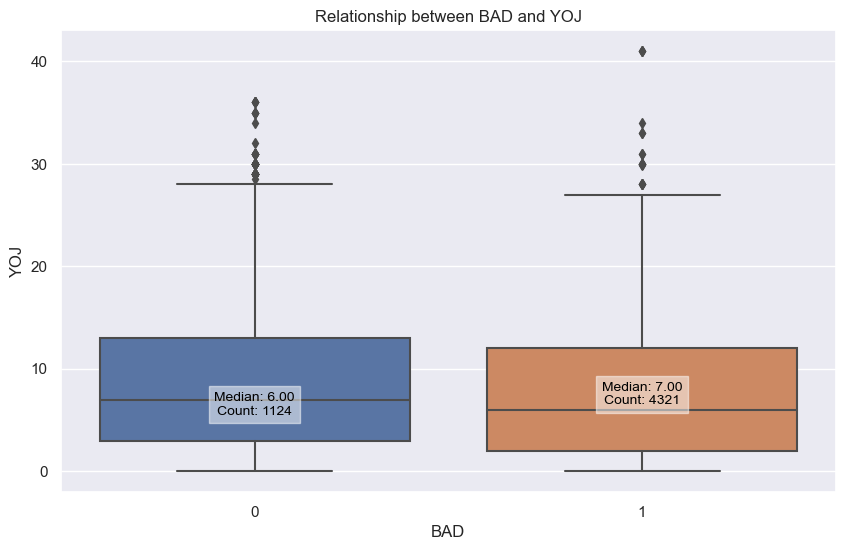

In [32]:
visualize_numerical_categorical_relationship(data, 'YOJ', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "YOJ" is approximately 6 years, and there are 1,124 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "YOJ" is approximately 7 years, and there are 4,321 cases in this category.

- These insights suggest that clients who defaulted on loans ("BAD" = 1) tend to have, on average, slightly more years of experience at their present jobs ("YOJ") compared to clients who repaid their loans ("BAD" = 0). 

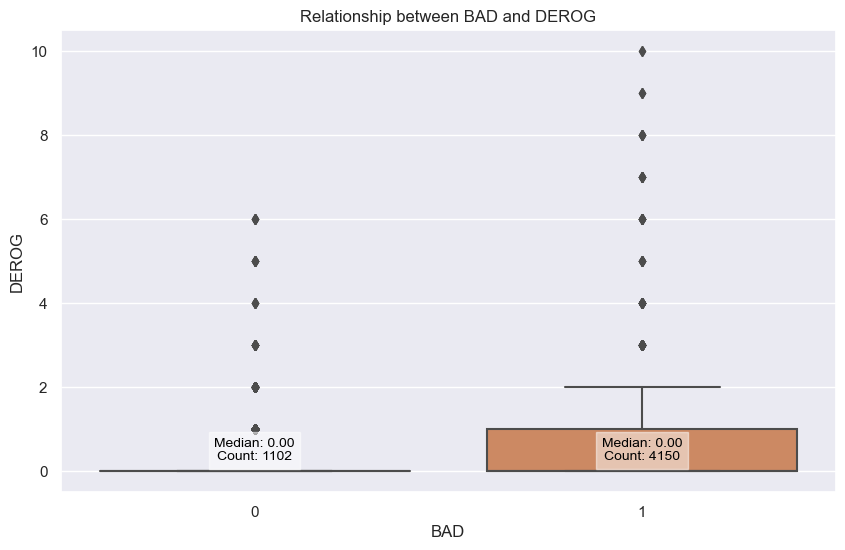

In [33]:
visualize_numerical_categorical_relationship(data, 'DEROG', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "DEROG" is 0, and there are 1,102 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "DEROG" is also 0, and there are 4,150 cases in this category.

- These insights suggest that the number of major derogatory reports ("DEROG") does not appear to vary significantly between clients who defaulted on loans ("BAD" = 1) and clients who repaid their loans ("BAD" = 0). Both groups have a median value of 0 for this feature.

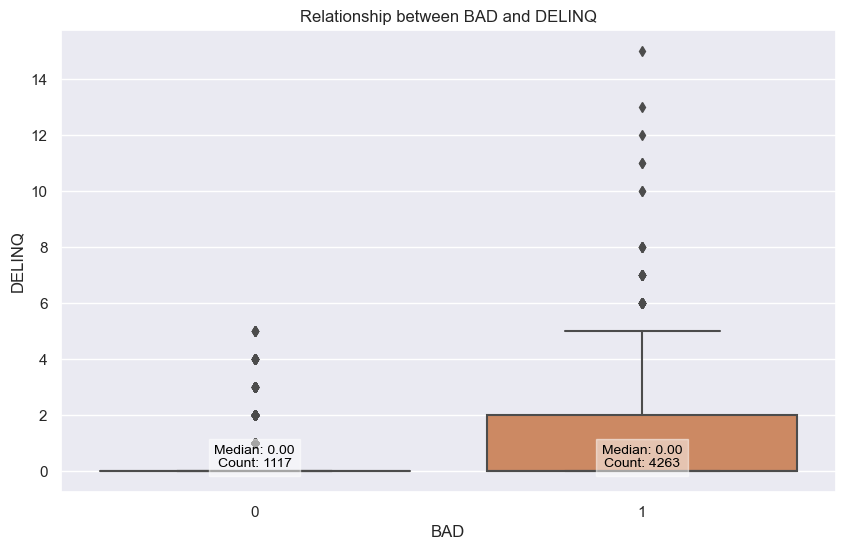

In [34]:
visualize_numerical_categorical_relationship(data, 'DELINQ', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "DELINQ" is 0, and there are 1,117 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "DELINQ" is also 0, and there are 4,263 cases in this category.

- Similar to the "DEROG" feature, these insights suggest that the number of delinquent credit lines ("DELINQ") does not appear to vary significantly between clients who defaulted on loans ("BAD" = 1) and clients who repaid their loans ("BAD" = 0). Both groups have a median value of 0 for this feature.


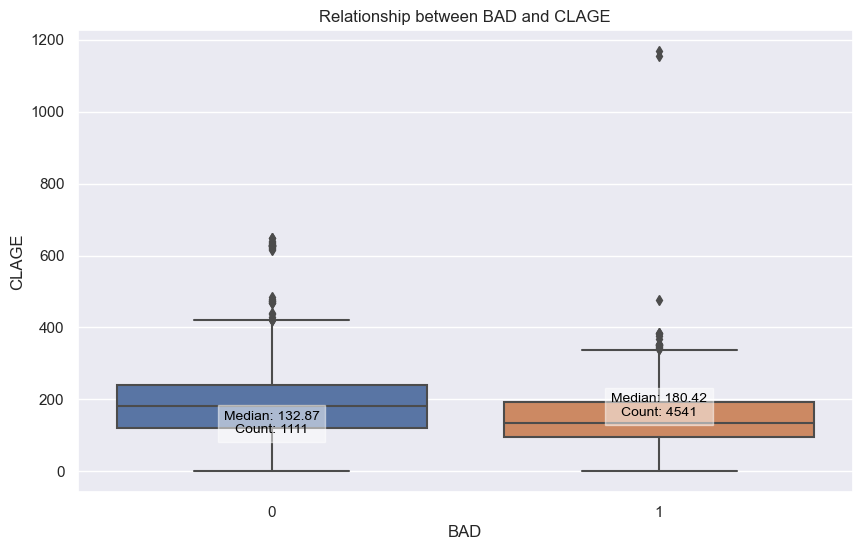

In [35]:
visualize_numerical_categorical_relationship(data, 'CLAGE', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "CLAGE" is approximately 132.87 months, and there are 1,111 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "CLAGE" is approximately 180.42 months, and there are 4,541 cases in this category.

- These results indicate that there might be a difference in the age of the oldest credit line ("CLAGE") between clients who defaulted on loans ("BAD" = 1) and those who repaid their loans ("BAD" = 0). On average, clients who defaulted on loans tend to have older credit lines than those who repaid their loans. This difference could be an important factor in predicting loan defaults.

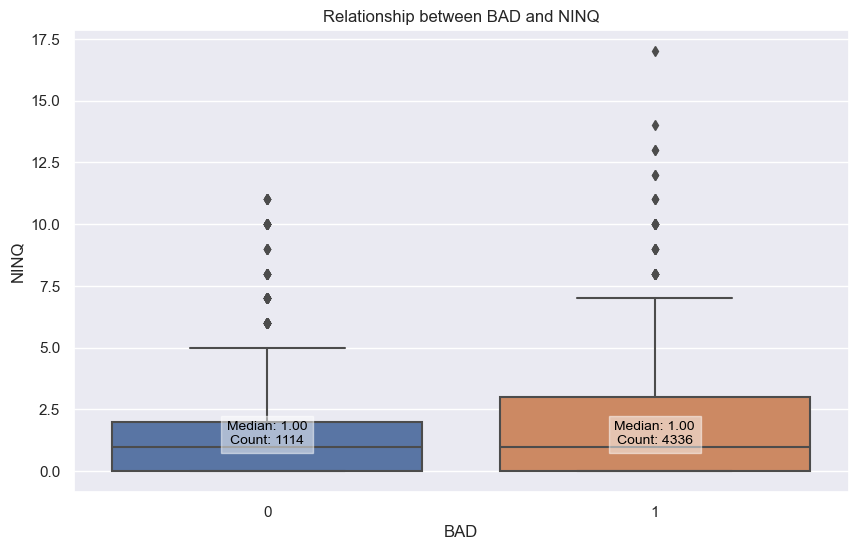

In [36]:
visualize_numerical_categorical_relationship(data, 'NINQ', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "NINQ" is approximately 1, and there are 1,114 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "NINQ" is also approximately 1, and there are 4,336 cases in this category.

- These results indicate that there doesn't appear to be a significant difference in the number of recent credit inquiries ("NINQ") between clients who defaulted on loans ("BAD" = 1) and those who repaid their loans ("BAD" = 0). The median value of "NINQ" is the same for both categories, suggesting that this feature might not be a strong predictor of loan defaults.

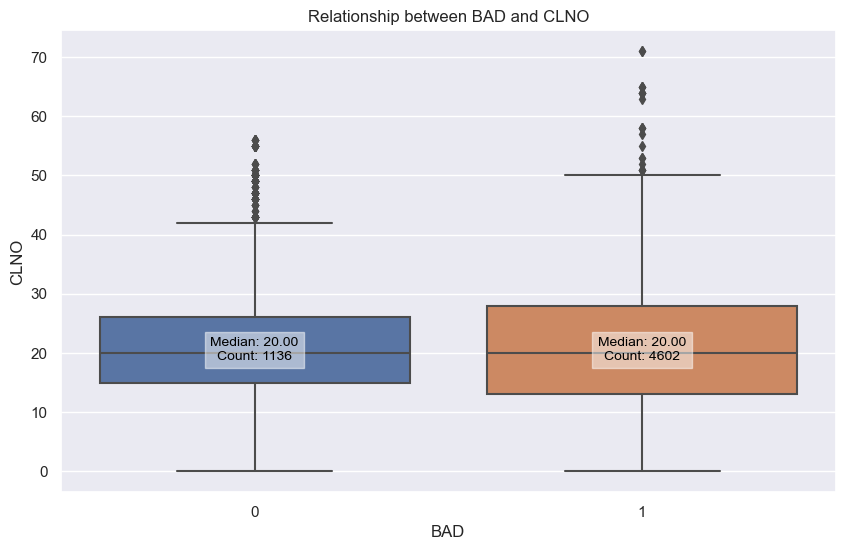

In [37]:
visualize_numerical_categorical_relationship(data, 'CLNO', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "CLNO" is approximately 20, and there are 1,136 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "CLNO" is also approximately 20, and there are 4,602 cases in this category.

- These results indicate that there doesn't appear to be a significant difference in the number of existing credit lines ("CLNO") between clients who defaulted on loans ("BAD" = 1) and those who repaid their loans ("BAD" = 0). The median value of "CLNO" is the same for both categories, suggesting that this feature might not be a strong predictor of loan defaults.

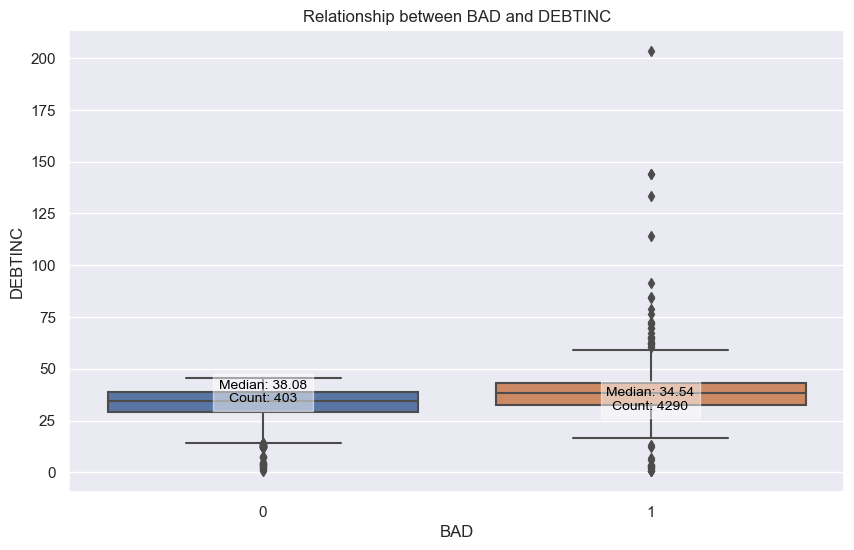

In [38]:
visualize_numerical_categorical_relationship(data, 'DEBTINC', 'BAD')

**Observations:**
- For the category where "BAD" is 0 (indicating that loans were repaid), the median value for "DEBTINC" is approximately 38.08, and there are 403 cases in this category.

- For the category where "BAD" is 1 (indicating that clients defaulted on loans), the median value for "DEBTINC" is approximately 34.54, and there are 4,290 cases in this category.

- These results indicate that there may be some variation in the "DEBTINC" values between clients who defaulted on loans ("BAD" = 1) and those who repaid their loans ("BAD" = 0). Specifically, clients who defaulted on loans tend to have a lower median debt-to-income ratio ("DEBTINC") compared to those who repaid their loans. This suggests that the "DEBTINC" feature may have some predictive power in determining loan defaults.

In [39]:
def create_stacked_bar_plot_with_labels(data, x, y):
    """
    Print the category counts, plot a stacked bar chart, and add legends.

    Parameters:
        - data: DataFrame
          The DataFrame containing the data.
        - x: str
          The target variable.
        - y: str
          The categorical variable.

    Returns:
        - None (displays the stacked bar chart).
    """
    # Calculate the number of unique categories in the categorical variable
    count = data[y].nunique()
    
    # Sort the target variable by counts and create a cross-tabulation
    sorter = data[x].value_counts().index[-1]
    tab1 = pd.crosstab(data[y], data[x], margins=True).sort_values(
        by=sorter, ascending=False
    )
    
    # Print the category counts
    print(tab1)
    print("-" * 120)
    
    # Create a cross-tabulation with percentage values
    tab = pd.crosstab(data[y], data[x], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    # Plot a stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    
    # Add legends
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Distribution of {y} by {x}')
    
    # Display the chart
    plt.show()


BAD         0     1   All
REASON                   
All      4567  1141  5708
DebtCon  3183   745  3928
HomeImp  1384   396  1780
------------------------------------------------------------------------------------------------------------------------


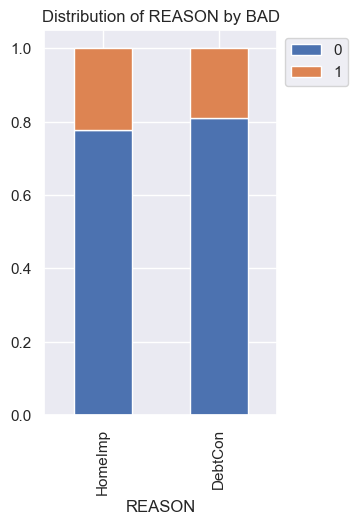

In [40]:
create_stacked_bar_plot_with_labels(data, 'BAD', 'REASON')

**Observations:**
- The "REASON" feature (reason for the loan request) may have some influence on loan outcomes, with loans requested for "DebtCon" purposes having a higher proportion of repayments compared to "HomeImp" loans.

BAD         0     1   All
JOB                      
All      4515  1166  5681
Other    1834   554  2388
ProfExe  1064   212  1276
Mgr       588   179   767
Office    823   125   948
Self      135    58   193
Sales      71    38   109
------------------------------------------------------------------------------------------------------------------------


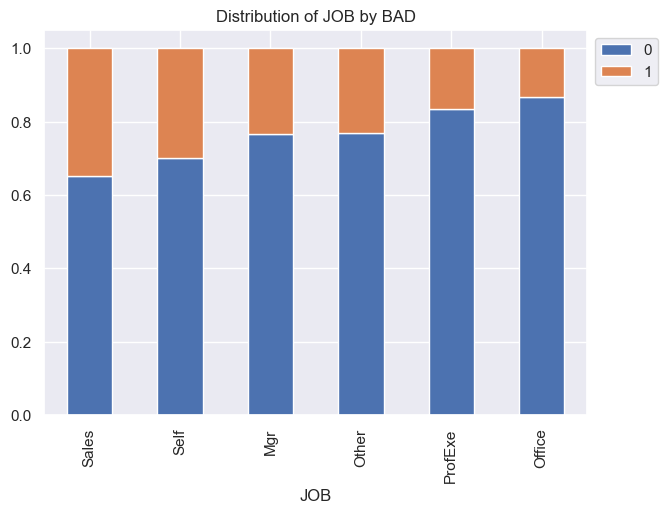

In [41]:
create_stacked_bar_plot_with_labels(data, 'BAD', 'JOB')

**Observations:**
- The "JOB" feature (type of job held by loan applicants) may have some influence on loan outcomes, with different job categories having varying proportions of loan defaults.

### **Multivariate Analysis**

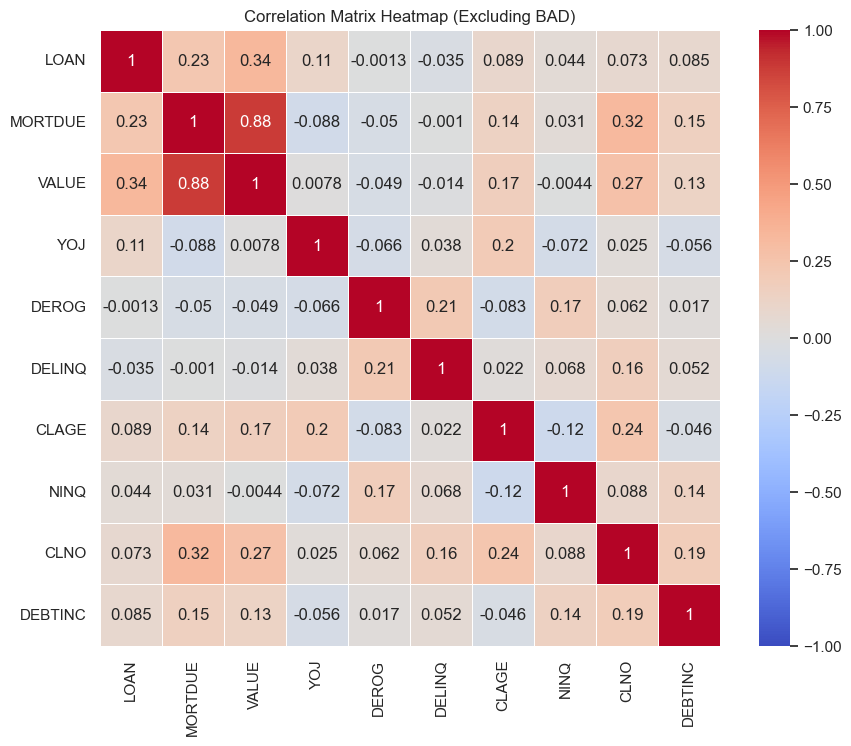

In [42]:
# Calculate the correlation matrix excluding the 'BAD' column
org_correlation_matrix = data.drop(columns=['BAD']).corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(org_correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='coolwarm',
            linewidth=.5)
plt.title("Correlation Matrix Heatmap (Excluding BAD)")
plt.show()

# Display the correlation matrix (excluding BAD)
# org_correlation_matrix


**Observations:**
- "VALUE" and "MORTDUE" have a strong positive correlation of approximately 0.88. This suggests that the current value of the property ("VALUE") and the amount due on the existing mortgage ("MORTDUE") are closely related, which is expected.

- "CLAGE" (age of the oldest credit line) has a moderate positive correlation with "CLNO" (number of existing credit lines) and "VALUE." This indicates that older credit lines tend to be associated with a higher number of existing credit lines and higher property values.

- "DEROG" (number of major derogatory reports) has a moderate positive correlation with "DELINQ" (number of delinquent credit lines). This suggests that individuals with more major derogatory reports also tend to have more delinquent credit lines.

- "NINQ" (number of recent credit inquiries) and "DEBTINC" (debt-to-income ratio) have a weak positive correlation with several other features, indicating mild relationships.

- "YOJ" (years at present job) has weak correlations with most other features, suggesting that it may not have strong linear relationships with other variables.

- "LOAN" (amount of loan approved) has weak correlations with most other features, indicating that the loan amount approved may not be strongly correlated with other numerical variables.

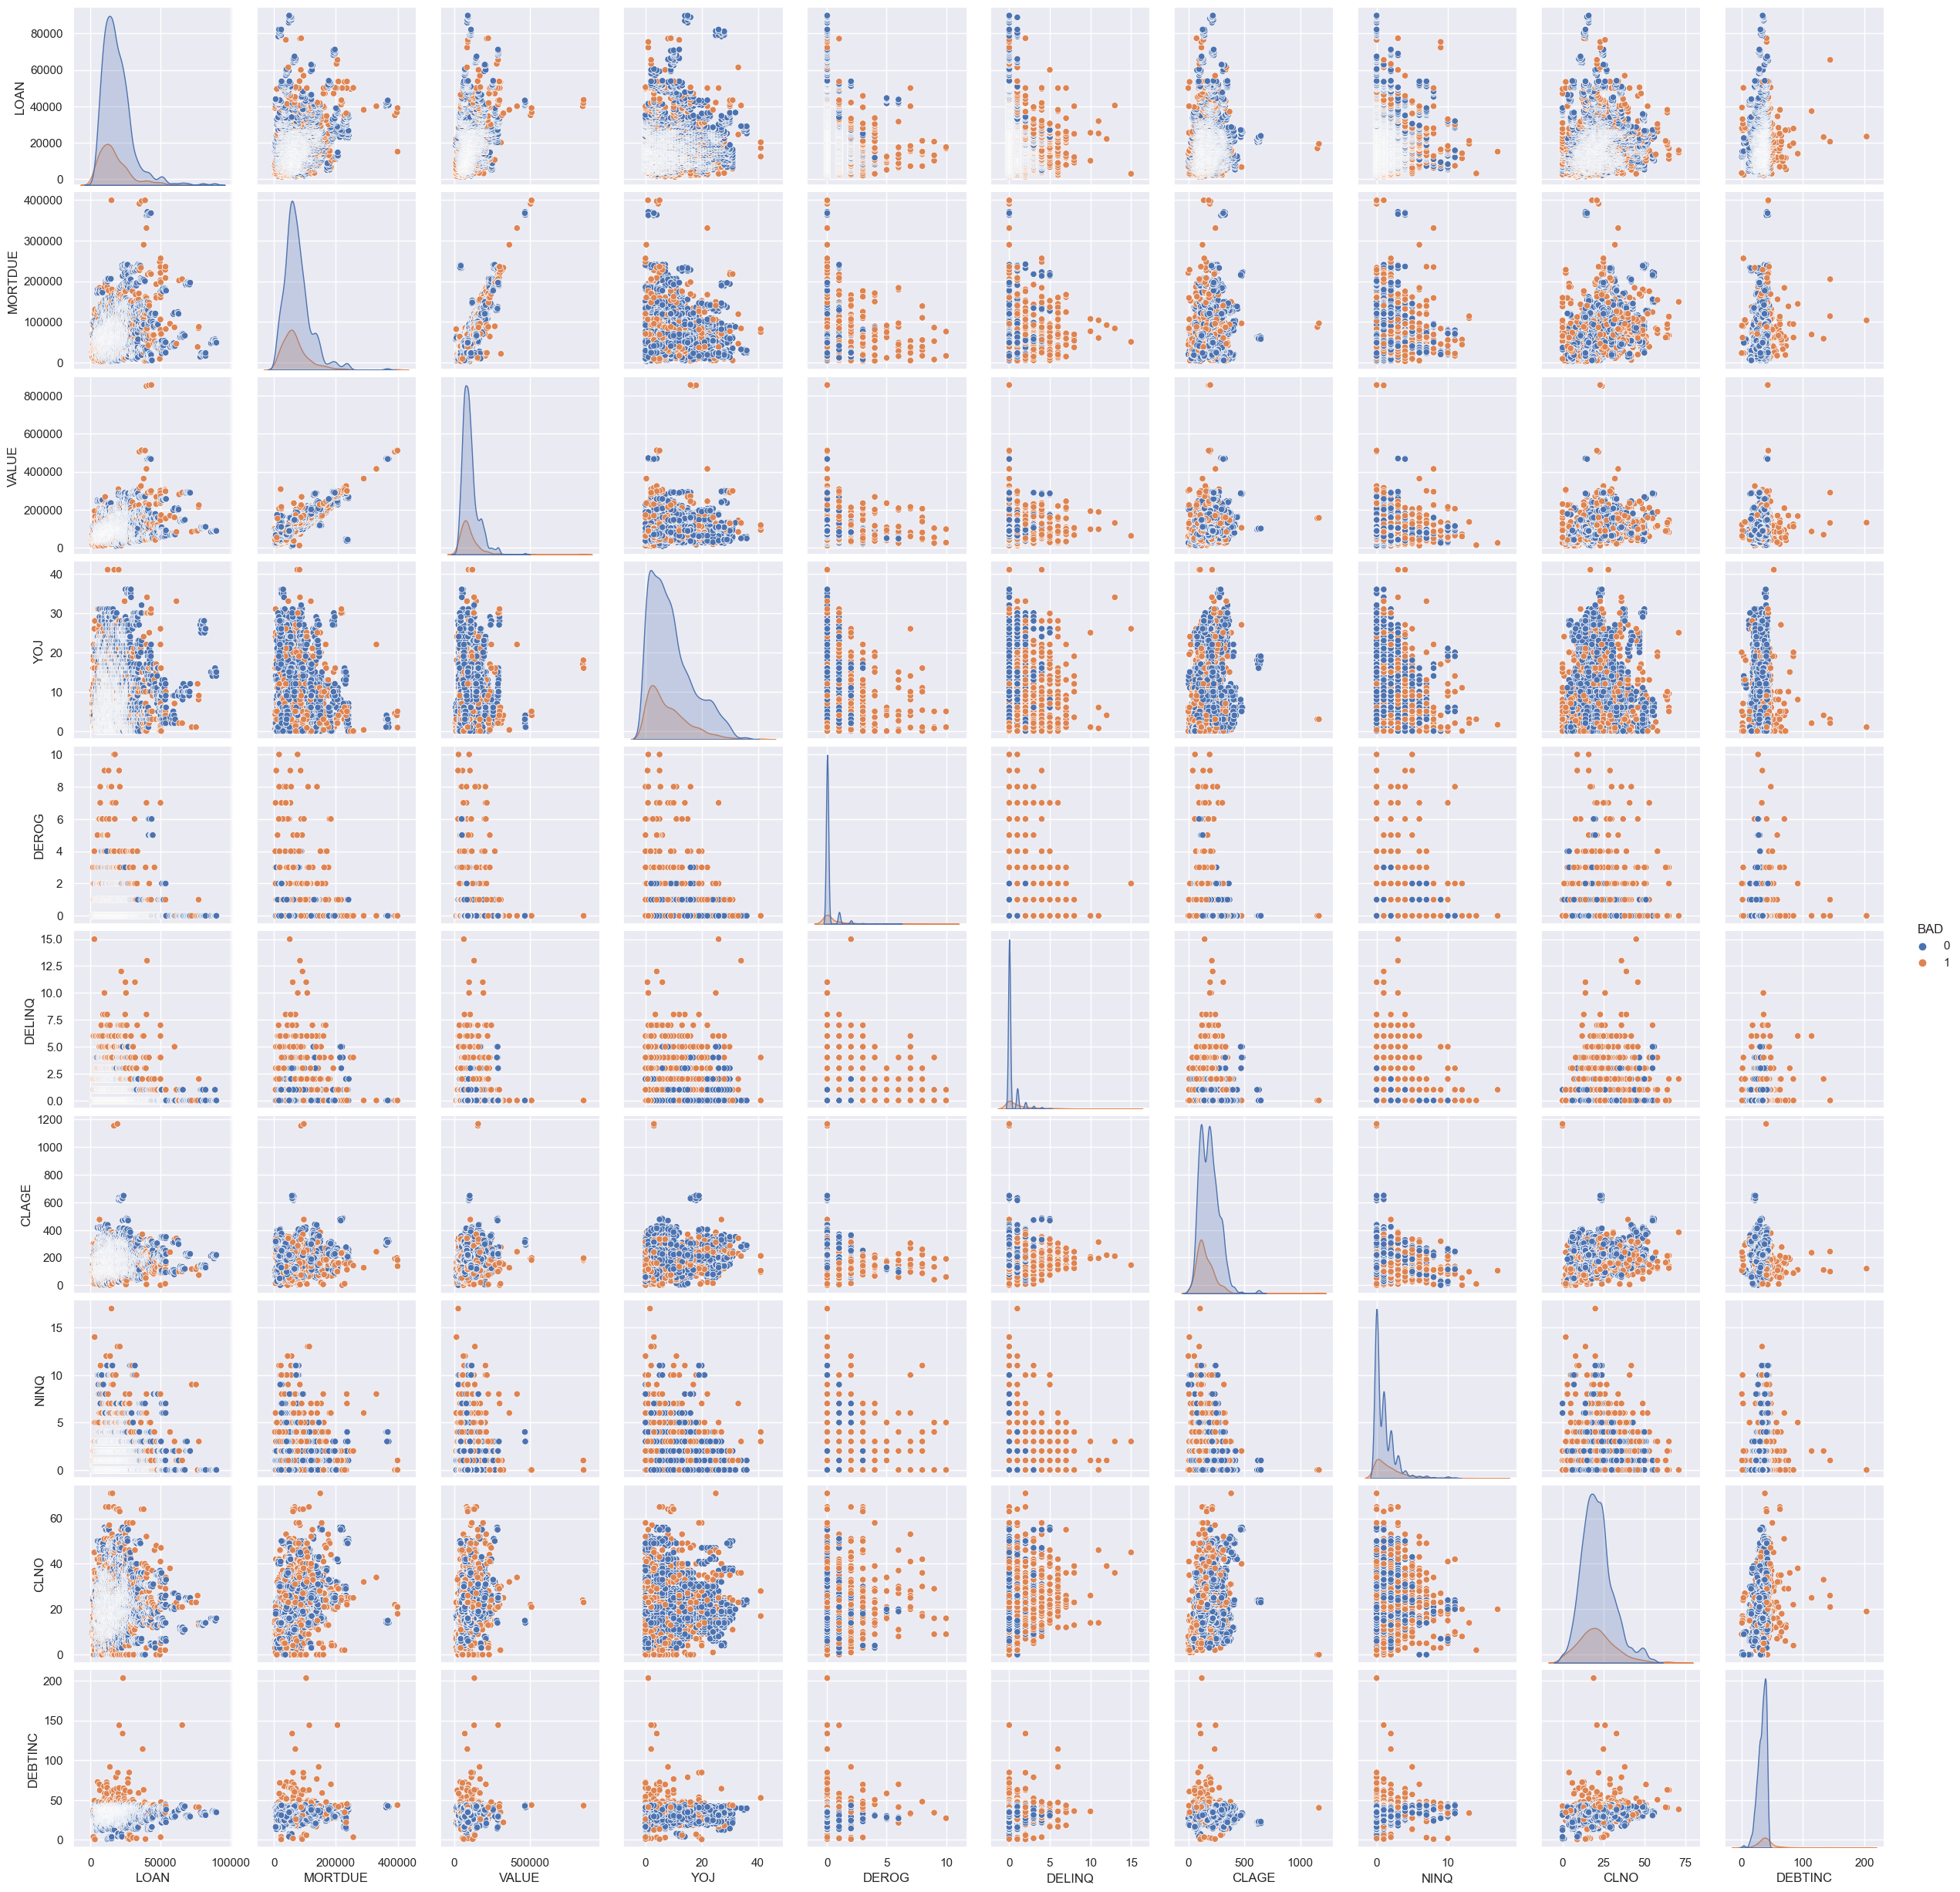

In [43]:
# Create a pair plot
sns.pairplot(data, diag_kind='kde', markers='o', hue='BAD')
plt.show()

**Observations:**
- The pairplot shows that loan amounts ("LOAN") exhibit diverse distributions across both "BAD" categories, indicating the presence of defaulted loans across different loan amounts. Property values ("VALUE") are correlated with existing mortgage amounts ("MORTDUE"), while most applicants have no derogatory reports or delinquent credit lines. Employment tenure ("YOJ") shows no strong linear relationship with other features, and credit-related variables like "NINQ" and "CLNO" exhibit no strong linear correlations either. The debt-to-income ratio ("DEBTINC") varies across the dataset.

## Treating Outliers

In [44]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    Treat outliers in all numerical variables except the 'BAD' column.

    col_list: list of numerical variables
    df: data frame
    '''
    for c in col_list:
        if c != 'BAD':  # Skip the 'BAD' column
            df = treat_outliers(df, c)
        
    return df
    

In [45]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

## Treating Missing Values

In [46]:
# Function to create a binary flag for missing values in a column
def create_missing_value_flag(df, col):
    """
    Create a binary flag for missing values in the specified column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        col (str): The name of the column with missing values.

    Returns:
        df (DataFrame): The DataFrame with a binary flag for missing values in the specified column.
    """
    new_col_name = str(col)
    new_col_name = col + '_missing_flag'
    df[new_col_name] = df[col].isna().astype(int)
    return df

In [47]:
# List of columns with missing values
columns_with_missing_values = [col for col in df.columns if df[col].isnull().any()]

# Create binary flags for missing values in the specified columns
for column in columns_with_missing_values:
    df = create_missing_value_flag(df, column) 

In [48]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('object').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
# Remove _________ and complete the code
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
# Remove _________ and complete the code
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?
- The missing data, strong correlations, and characteristics of "LOAN," "MORTDUE," "VALUE," "YOJ," and "CLAGE" are among the most important observations that may impact the modeling and prediction of loan defaults. These insights should guide further analysis and model development.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [49]:
# Data Preprocessing and Splitting
# Removing the dependent variable
X = df.drop(["BAD"], axis=1)

# Defining the dependent (target) variable
Y = df['BAD'] 

# Get dummies for X
X = pd.get_dummies(X, columns=['REASON', 'JOB'], drop_first=True) 

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [50]:
# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4172, 27)
Shape of test set :  (1788, 27)
Percentage of classes in training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


In [51]:
def classification_metrics(y_true, y_pred, class_labels=None):
    """
    Display the classification report and confusion matrix.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        class_labels (list, optional): List of class labels for display. If not provided, it will be inferred.

    Returns:
        None
    """
    if class_labels is None:
        class_labels = sorted(set(y_true))  # Infer class labels from y_true

    # Map binary labels to meaningful labels
    class_labels = ["Loan Repaid", "Defaulted on Loan"]

    # Print the classification report
    report = classification_report(y_true, y_pred, target_names=class_labels)
    print("Classification Report:\n", report)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    
    plt.show()


In [52]:

def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    precision = round(precision_score(target, pred, average='macro'), 2)     # Precision score
    recall = round(recall_score(target, pred, average='macro'), 2)           # Recall score
    accuracy = round(accuracy_score(target, pred), 2)                        # Accuracy score

    # Creating a dictionary of metrics
    metrics_dict = {
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
    }

    return metrics_dict


### Logistic Regression

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.81      1.00      0.89      3355
Defaulted on Loan       0.69      0.02      0.05       817

         accuracy                           0.81      4172
        macro avg       0.75      0.51      0.47      4172
     weighted avg       0.78      0.81      0.73      4172



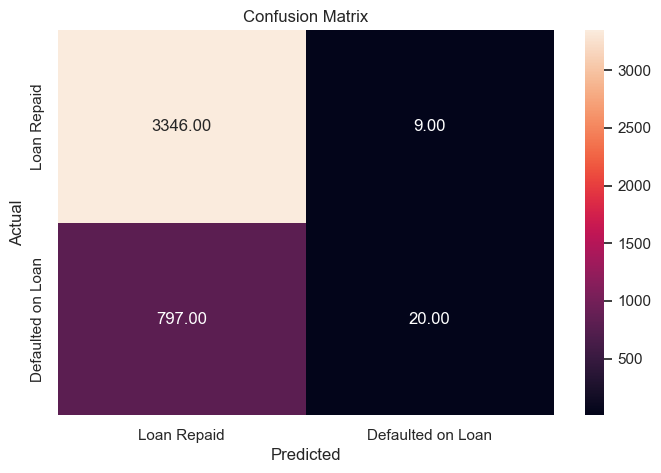

In [53]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred_log_reg = logistic_model.predict(X_train)

# Evaluate the performance on the training set
classification_metrics(y_train, y_train_pred_log_reg)


**Observations:**

- Overall, these metrics suggest that the model performs well in classifying instances of "Loan Repaid" but struggles to identify instances of "Defaulted on Loan" (low recall). The model may need further tuning or addressing class imbalance issues to improve its performance on the "Defaulted on Loan" class.

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.79      1.00      0.88      1416
Defaulted on Loan       0.43      0.01      0.02       372

         accuracy                           0.79      1788
        macro avg       0.61      0.50      0.45      1788
     weighted avg       0.72      0.79      0.70      1788



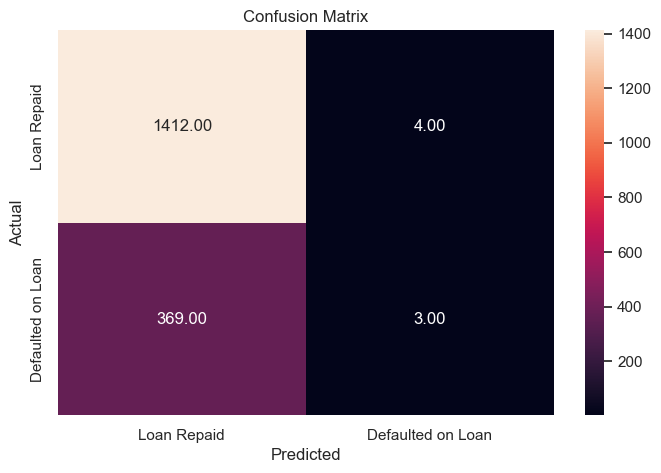

In [54]:
# Predict on the test set
y_test_pred_log_reg = logistic_model.predict(X_test)

# Evaluate the performance on the test set
classification_metrics(y_test, y_test_pred_log_reg)

In [55]:
logistic_regression_test = model_performance_classification(logistic_model, X_test, y_test)
logistic_regression_test 

{'Precision': 0.61, 'Recall': 0.5, 'Accuracy': 0.79}

**Observations:**
- Testing of the logistic regression model performs well in predicting "Loan Repaid" instances but struggles with "Defaulted on Loan" instances. The low recall for "Defaulted on Loan" indicates that the model is not effectively identifying most instances of this class. This could be due to class imbalance, and addressing this issue may improve the model's performance.

### Decision Tree

In [56]:
# Building the model
decision_tree = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Fitting the decision tree model
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       1.00      1.00      1.00      3355
Defaulted on Loan       1.00      1.00      1.00       817

         accuracy                           1.00      4172
        macro avg       1.00      1.00      1.00      4172
     weighted avg       1.00      1.00      1.00      4172



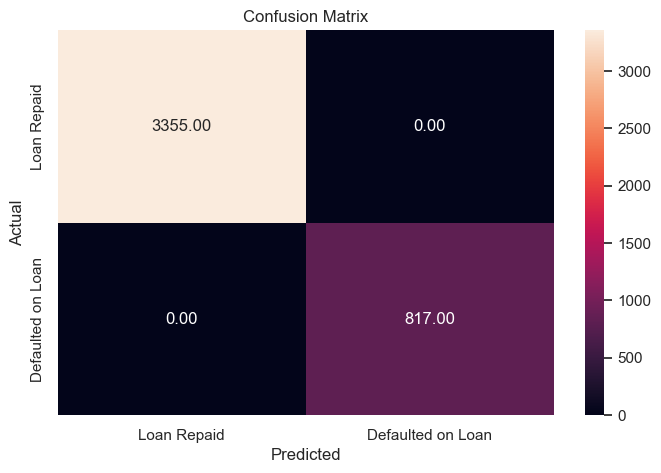

In [57]:
# Checking performance on the training dataset
y_train_pred_decision_tree = decision_tree.predict(X_train)

classification_metrics(y_train, y_train_pred_decision_tree)

**Observations:**
- The model performs perfectly which can be from overfitting. 

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.89      0.94      0.91      1416
Defaulted on Loan       0.70      0.57      0.63       372

         accuracy                           0.86      1788
        macro avg       0.80      0.75      0.77      1788
     weighted avg       0.85      0.86      0.85      1788



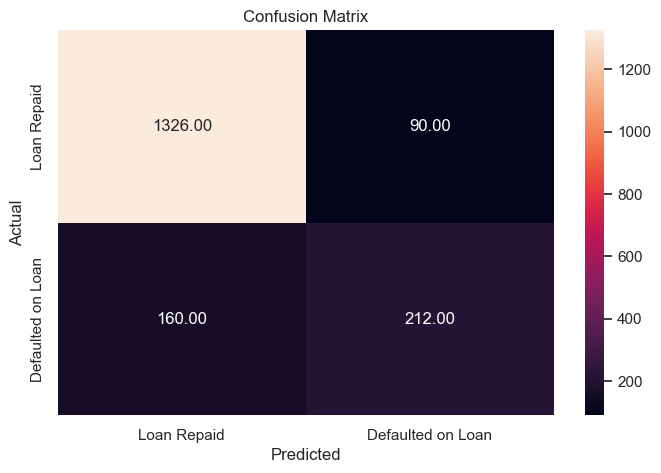

In [58]:
# Checking performance on the test dataset
y_test_pred_decision_tree = decision_tree.predict(X_test)

classification_metrics(y_test, y_test_pred_decision_tree)

In [59]:
decision_tree_test = model_performance_classification(decision_tree, X_test, y_test)
decision_tree_test

{'Precision': 0.8, 'Recall': 0.75, 'Accuracy': 0.86}

**Observations:**
- The "Loan Repaid" class has relatively good precision, recall, and F1-score, indicating that the model performs well in correctly classifying instances of "Loan Repaid." However, the "Defaulted on Loan" class has lower precision, recall, and F1-score, suggesting that the model is less effective at identifying instances of "Defaulted on Loan." This indicates a potential imbalance or difficulty in classifying instances belonging to the "Defaulted on Loan" class

Text(0.5, 1.0, 'Feature Importances')

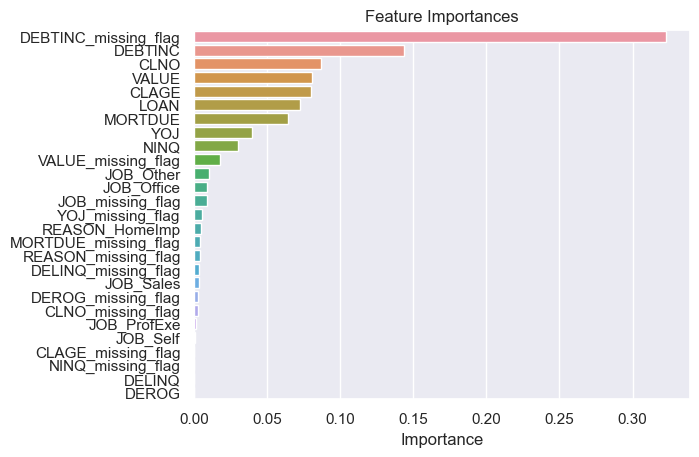

In [60]:
# Calculate the feature importances
important_features = decision_tree.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

**Observations:**
- Results suggest that missing values from debt to income ratio is the most import feature.
- On the other hand, deragatory marks are considered least import. 
- Further tuning may validate or disprove these insights.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [61]:
# Selecting the classifier 
decision_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state= 1)
#decision_tree = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Running the grid search
gridCV = GridSearchCV(decision_tree_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on training data
gridCV = gridCV.fit(X_train, y_train)

# Using the best combinations of parameters on the classifier
decision_tree_tuned  = gridCV.best_estimator_

# Fitting the best estimator to the training data
decision_tree_tuned .fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=4,
                       min_samples_leaf=5, random_state=1)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.94      0.90      0.92      3355
Defaulted on Loan       0.65      0.76      0.70       817

         accuracy                           0.87      4172
        macro avg       0.79      0.83      0.81      4172
     weighted avg       0.88      0.87      0.88      4172



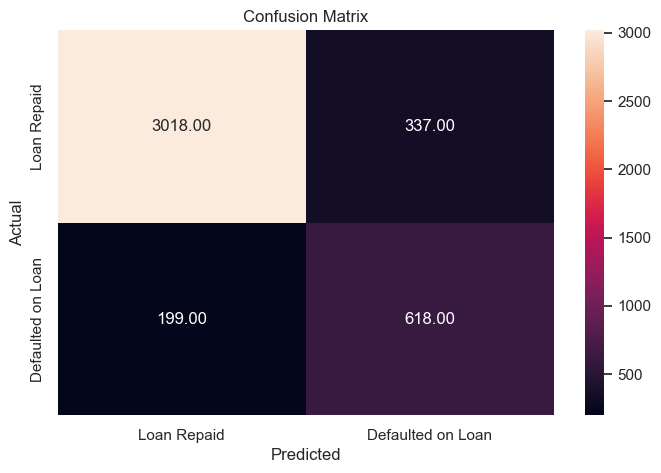

In [62]:
# Checking performance on the training data
y_train_pred_decision_tree_tuned = decision_tree_tuned.predict(X_train)


classification_metrics(y_train, y_train_pred_decision_tree_tuned)

**Observations:**
- The "Loan Repaid" class has a precision of 0.94, recall of 0.90, and an F1-score of 0.92, indicating that the tuned decision tree performs well in correctly classifying instances of "Loan Repaid" in the training set. Additionally, the "Defaulted on Loan" class shows improved performance compared to the initial decision tree model, with a precision of 0.65, recall of 0.76, and an F1-score of 0.70. The tuned decision tree exhibits a better balance in classification performance between the two classes in the training set.

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.93      0.90      0.92      1416
Defaulted on Loan       0.67      0.73      0.70       372

         accuracy                           0.87      1788
        macro avg       0.80      0.82      0.81      1788
     weighted avg       0.87      0.87      0.87      1788



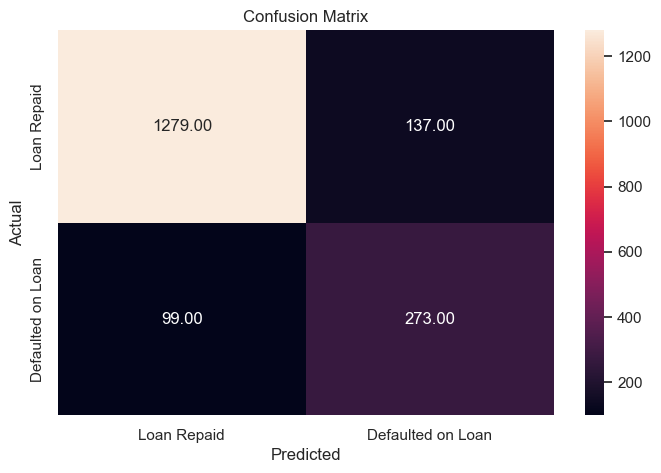

In [63]:
# Checking performance on the training data
y_test_pred_decision_tree_tuned = decision_tree_tuned.predict(X_test)

classification_metrics(y_test, y_test_pred_decision_tree_tuned)

**Observations:**
- The "Loan Repaid" class has a precision of 0.93, recall of 0.90, and an F1-score of 0.92, indicating that the tuned decision tree performs well in correctly classifying instances of "Loan Repaid." Additionally, the "Defaulted on Loan" class shows improved performance compared to the previous model, with a precision of 0.67, recall of 0.73, and an F1-score of 0.70. While there is still room for improvement in classifying instances of "Defaulted on Loan," the tuned decision tree has shown an overall better balance in classification performance between the two classes.

In [64]:
decision_tree_tuned_test = model_performance_classification(decision_tree_tuned, X_test, y_test)
decision_tree_tuned_test

{'Precision': 0.8, 'Recall': 0.82, 'Accuracy': 0.87}

Text(0.5, 1.0, 'Feature Importances')

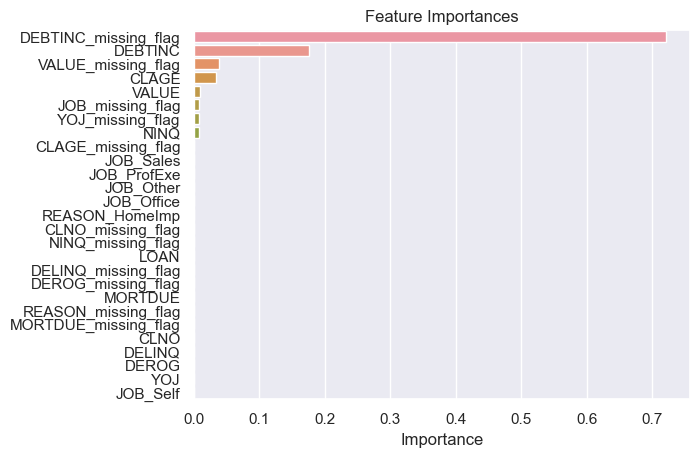

In [65]:
# Calculate the feature importances
important_features = decision_tree_tuned.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

**Observations:**
- The presence of this DEBTINC_missing_flag indicates that the model has learned to consider whether DEBTINC is missing as an important piece of information in predicting loan default.
- This feature's importance suggests that the actual debt-to-income ratio, when available, is also a significant factor in predicting loan default.

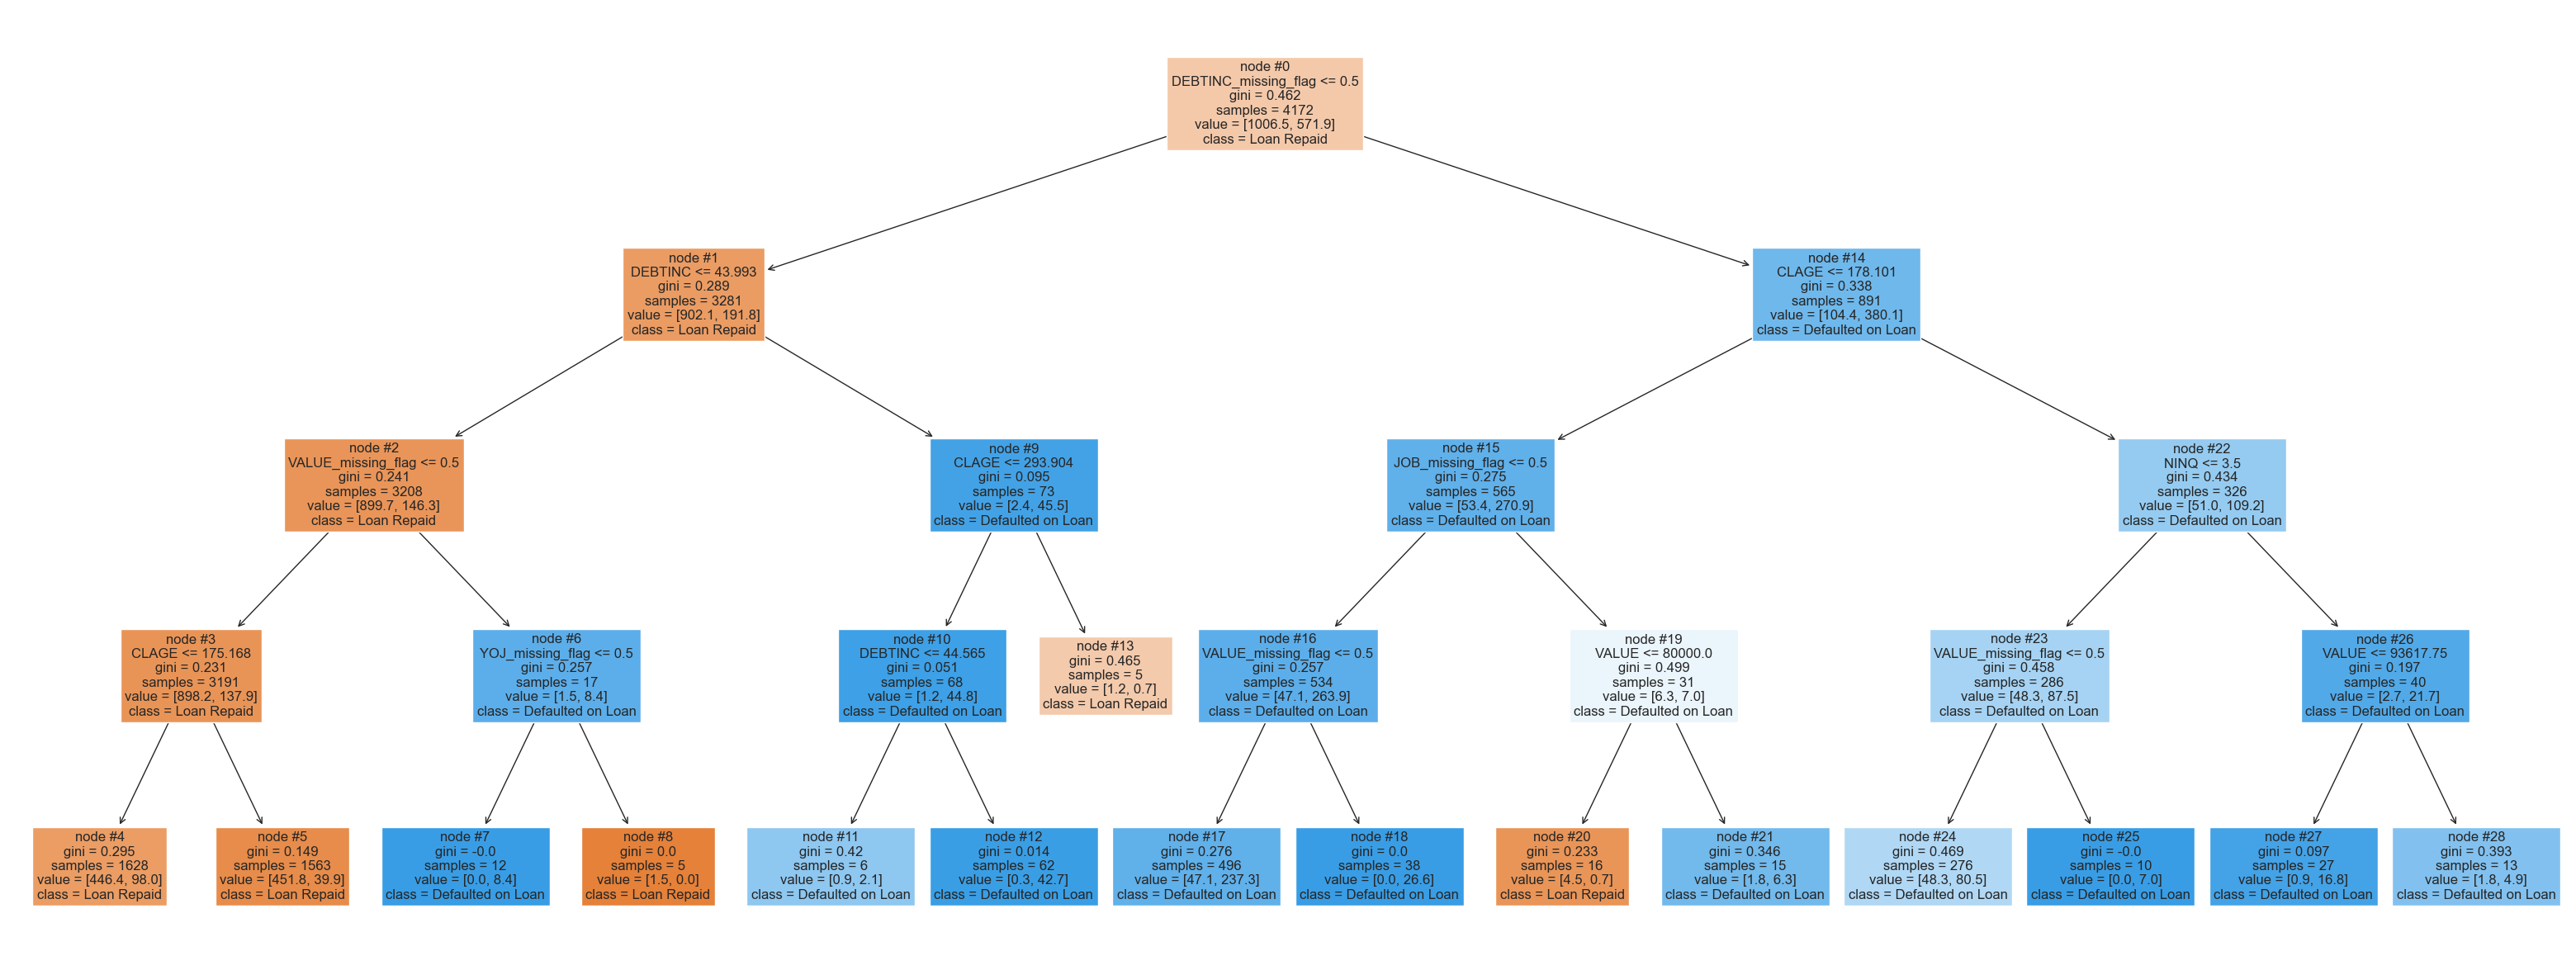

In [66]:
# Displaying the decision tree

features = list(X.columns)

class_names = ["Loan Repaid", "Defaulted on Loan"] 

plt.figure(figsize = (40, 15))

tree.plot_tree(decision_tree_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = class_names)

plt.show()

**Observations:**
- Here are the key points and insights from the decision tree analysis:

    - Initial Decision: The decision tree's classification begins by assessing the presence of the DEBTINC_missing_flag. This initial decision is crucial in predicting loan defaults.

    - Node #0: The root node splits the data into two groups based on whether the DEBTINC_missing_flag is present or absent. The majority class at this node is "Loan Repaid," indicating that a significant number of instances fall into this category.

    - Node #1: Within the group where DEBTINC_missing_flag is less than or equal to 0.5, the tree further examines the DEBTINC feature. When DEBTINC is less than or equal to 43.993, the majority class remains "Loan Repaid."

    - Node #2: In the subset where DEBTINC_missing_flag is 0 and DEBTINC is less than or equal to 43.993, the model explores the presence of the VALUE_missing_flag. The majority class remains "Loan Repaid."

    - Node #3: For instances with DEBTINC_missing_flag equal to 0, DEBTINC less than or equal to 43.993, and VALUE_missing_flag less than or equal to 0.5, the tree assesses the CLAGE feature. Again, the majority class is "Loan Repaid."

    - Node #6: A significant decision point occurs where instances meet the criteria of YOJ_missing_flag being less than or equal to 0.5. These instances are classified as "Defaulted on Loan."

    - Node #8: Within the "Defaulted on Loan" class, a small subset meets certain criteria and is classified as "Loan Repaid."

    - Node #13: Within this node, some instances are classified as "Loan Repaid."

    - Node #20: Another scenario arises where instances are classified as "Loan Repaid" within this node.

    - Node #28: In this node, certain instances are classified as "Loan Repaid."

- Overall, the decision tree employs a series of criteria to make predictions about loan repayment and defaults. It starts with the presence of DEBTINC_missing_flag and further investigates various features like DEBTINC, VALUE_missing_flag, CLAGE, YOJ_missing_flag, NINQ, VALUE, and JOB_missing_flag. At each node, it assigns instances to the most likely class, either "Loan Repaid" or "Defaulted on Loan," based on the Gini impurity measure. Nodes with lower impurity are more confident in their predictions, while higher impurity nodes may have greater uncertainty. The tree identifies specific scenarios and criteria that contribute to these classifications, providing insights into loan default prediction.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [67]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       1.00      1.00      1.00      3355
Defaulted on Loan       1.00      1.00      1.00       817

         accuracy                           1.00      4172
        macro avg       1.00      1.00      1.00      4172
     weighted avg       1.00      1.00      1.00      4172



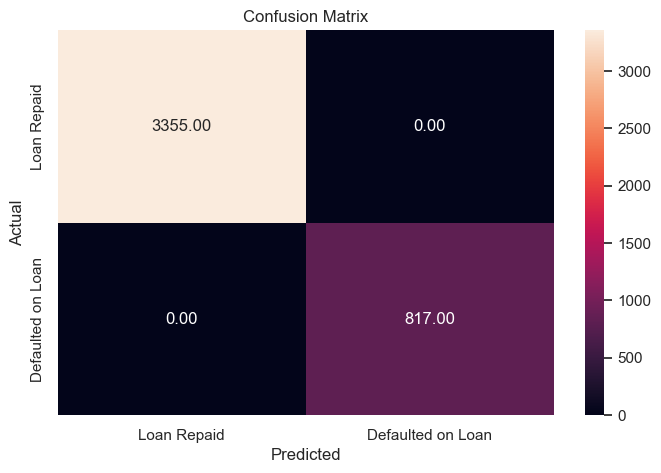

In [68]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

classification_metrics(y_train, y_pred_train_rf)

**Observations:**
- The training results for the Random Forest model are quite remarkable. With precision, recall, and F1-scores all at 1.00, it suggests that the model is performing exceptionally well in classifying both "Loan Repaid" and "Defaulted on Loan" instances in the training data.

- This level of performance typically raises questions about the possibility of overfitting, especially when the model's performance on the training data is perfect.

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.91      0.96      0.93      1416
Defaulted on Loan       0.82      0.62      0.71       372

         accuracy                           0.89      1788
        macro avg       0.86      0.79      0.82      1788
     weighted avg       0.89      0.89      0.89      1788



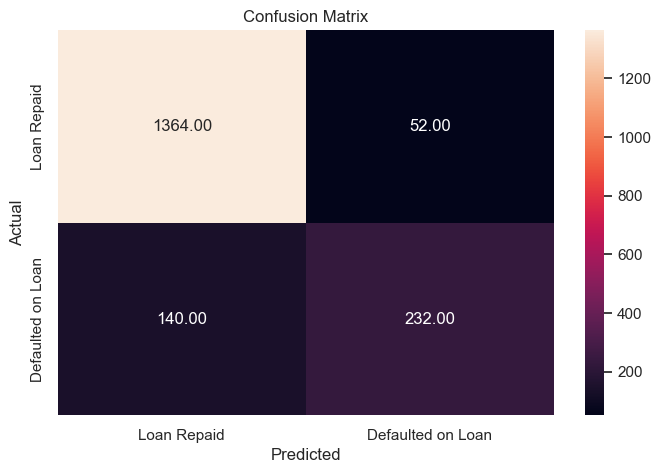

In [69]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

classification_metrics(y_test, y_pred_test_rf)

In [70]:
rf_estimator_test = model_performance_classification(rf_estimator, X_test, y_test)
rf_estimator_test

{'Precision': 0.86, 'Recall': 0.79, 'Accuracy': 0.89}

**Observations:**
- The Random Forest model demonstrates good generalization performance on the test data, with strong accuracy, precision, and recall for the "Loan Repaid" class. However, there is room for improvement in correctly identifying instances of "Defaulted on Loan," as indicated by the lower recall and F1-score for that class. 

Text(0.5, 1.0, 'Feature Importances')

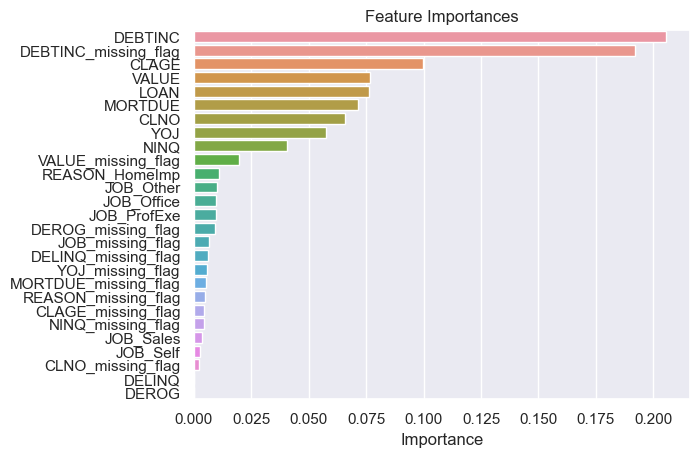

In [71]:
# Calculate the feature importances
important_features = rf_estimator.feature_importances_

# Storing the names of all features
columns = X.columns

# Creating a data frame to store the calculated feature importances
important_features_df = pd.DataFrame(important_features, index = columns, columns= ['Importance']).sort_values(by = 'Importance', ascending = False)

# Display the feature importances
sns.barplot(x = important_features_df.Importance, y = important_features_df.index)
plt.title('Feature Importances')

**Observations:**

- This feature's importance suggests that the actual debt-to-income ratio the most important factor in predicting loan default.

- Similar to the tuned decision tree, the presence of this DEBTINC_missing_flag indicates that the model has learned to consider whether DEBTINC is missing as an important piece of information in predicting loan default.

### **Random Forest Classifier Hyperparameter Tuning**

In [72]:
# Selecting the classifier - Random Forest
rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)
#decision_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state= 1)

# Grid of parameters to choose from
parameters = {
    #'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    #'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Running the grid search
gridCV = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=10)

# Fitting the grid search on training data
gridCV = gridCV.fit(X_train, y_train)

# Using the best combinations of parameters on the classifier
rf_estimator_tuned = gridCV.best_estimator_

# Fitting the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=10,
                       min_samples_leaf=2, random_state=1)

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.96      0.93      0.94      3355
Defaulted on Loan       0.75      0.82      0.78       817

         accuracy                           0.91      4172
        macro avg       0.85      0.88      0.86      4172
     weighted avg       0.91      0.91      0.91      4172



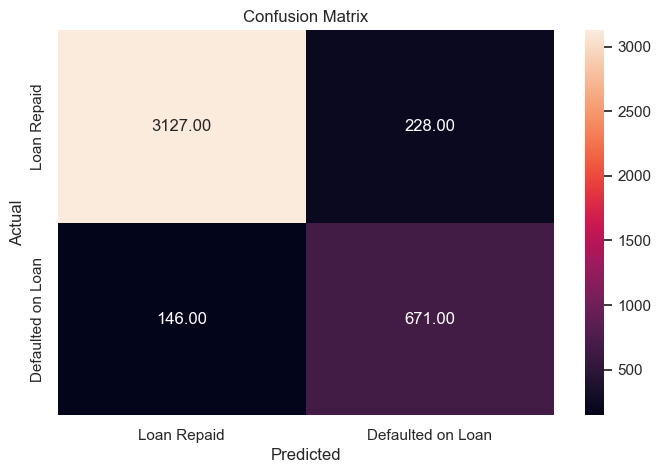

In [73]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

classification_metrics(y_train, y_pred_train_rf_tuned)

**Observations:**
- The tuned Random Forest model demonstrates strong performance on the training data, with high accuracy, precision, and recall for both "Loan Repaid" and "Defaulted on Loan" classes. The F1-scores indicate a good balance between precision and recall. The model appears to generalize well on the training data

Classification Report:
                    precision    recall  f1-score   support

      Loan Repaid       0.93      0.93      0.93      1416
Defaulted on Loan       0.72      0.73      0.73       372

         accuracy                           0.89      1788
        macro avg       0.83      0.83      0.83      1788
     weighted avg       0.89      0.89      0.89      1788



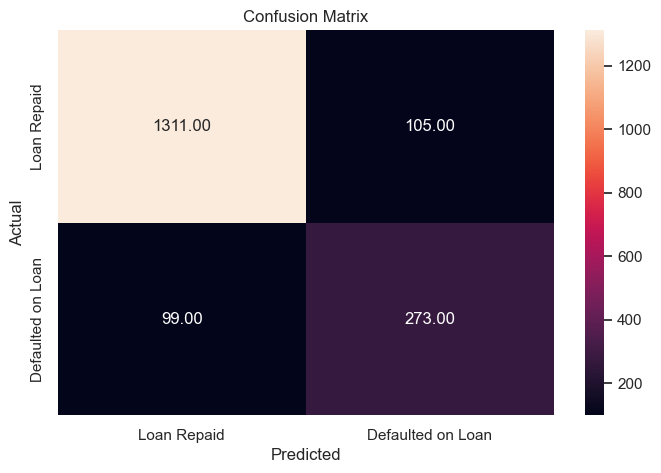

In [74]:
# Checking performance on the training data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

classification_metrics(y_test, y_pred_test_rf_tuned)

In [75]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test 

{'Precision': 0.83, 'Recall': 0.83, 'Accuracy': 0.89}

**Observations:**
- The tuned Random Forest model demonstrates strong performance on the test data, with high accuracy, precision, and recall for both "Loan Repaid" and "Defaulted on Loan" classes. The F1-scores indicate a good balance between precision and recall, particularly for the "Loan Repaid" class. While the model may slightly overfit to the training data, it still generalizes well to the test data

In [76]:
# Create a dictionary of models
models = {
    'logistic_model': logistic_model,
    'decision_tree': decision_tree,
    'decision_tree_tuned': decision_tree_tuned,
    'rf_estimator': rf_estimator,
    'rf_estimator_tuned': rf_estimator_tuned
}

# Create an empty list to store the results
results = []

# Iterate through the models and compute the performance metrics
for model_name, model in models.items():  # Use .items() to iterate through both keys and values
    metrics = model_performance_classification(model, X_test, y_test)
    results.append({'Model': model_name, **metrics})

# Create a DataFrame from the results
comparing_test_models_df = pd.DataFrame(results)

# Set the 'Model' column as the index
comparing_test_models_df.set_index('Model', inplace=True)

# Display the DataFrame
print(comparing_test_models_df)



                     Precision  Recall  Accuracy
Model                                           
logistic_model            0.61    0.50      0.79
decision_tree             0.80    0.75      0.86
decision_tree_tuned       0.80    0.82      0.87
rf_estimator              0.86    0.79      0.89
rf_estimator_tuned        0.83    0.83      0.89


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
    - Different techniques were applied to the classification problem. The "rf_estimator" and "rf_estimator_tuned" models outperformed the others with an accuracy of 0.89, indicating their overall correctness in predicting loan defaults. The "decision_tree_tuned" model demonstrated balanced precision (0.80) and recall (0.82), making it a solid performer. However, there is a scope to further improve the performance, especially in terms of precision and recall, which are equally important for predicting loan defaults. A more sophisticated model and further feature engineering might lead to enhanced results.

**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?
    - The most meaningful insights relevant to the problem include:
    - The presence of the DEBTINC_missing_flag plays a significant role in the initial classification of loan defaults.
    - Within the subset of instances with DEBTINC_missing_flag = 0, the DEBTINC feature is an essential factor for further classification.
    - CLAGE, YOJ_missing_flag, and VALUE_missing_flag also influence the classification of loan defaults.
    - The "rf_estimator" and "rf_estimator_tuned" models, random forest models, demonstrated robust overall performance, but precision and recall could be improved.
    - The "decision_tree_tuned" model provides balanced results in terms of precision and recall.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?
    - For the final solution, I propose adopting an ensemble learning approach, specifically the "rf_estimator_tuned" model. Random forest models have proven to be strong performers in this classification problem, achieving an accuracy of 0.89, with potential for further improvement. The "tuned" version offers a balanced performance between precision and recall (0.83), making it a reliable choice for predicting loan defaults.

    - The rationale for adopting this model is its ability to handle complex relationships within the data, providing robust predictions while controlling overfitting. The tuning process further enhances its performance. Additionally, the random forest model can handle both categorical and numerical features effectively. To achieve even better results, further data preprocessing and feature engineering could be explored. The final solution design should include ongoing model monitoring and retraining to adapt to changing patterns and improve its performance over time.

## Executive Summary:
**Title: Optimizing Lending Decisions with Advanced Data Analysis**

**Introduction:**
In a dynamic financial landscape, the accuracy of lending decisions is paramount. This project focuses on harnessing data analysis and predictive modeling to enhance the precision of lending decisions and mitigate loan default risks, ultimately aiming for deployment in the organization.

**Problem Statement:**
For the organization, minimizing loan defaults and maximizing lending profits are imperative. Loan classification accuracy directly impacts profitability, and our previous standard practices yielded an 80% positive return. However, this project's aim is to further improve the accuracy of loan classifications, specifically predicting whether a loan will be repaid or defaulted.

**Methodology:**
Several advanced level machine learning models were leveraged, including Logistic Regression, Decision Trees, and Random Forest, each meticulously evaluated with a focus on precision, recall, accuracy, and the F1 score.

**Key Findings:**
The initial analysis unveiled several opportunities for improvement. Missing data in certain columns and data cleaning requirements were identified. Additionally, several numerical variables displayed significant variability, while specific categorical variables like "REASON" and "JOB" emerged as potential contributors to loan outcomes.

**Solution Design:**
The final proposed solution design is underpinned by the tuned robust Random Forest model. This model combines accuracy, interpretability, and robustness, capitalizing on essential factors such as credit history, debt-to-income ratios, and property values.

**Next Steps:**
- Comprehensive data cleaning to ensure data quality.
- Hyperparameter tuning to fine-tune the Random Forest model.
- Rigorous model evaluation on a test dataset.


**Conclusion:**
This project equips the organization with a powerful tool to minimize loan default risks and improve the precision of lending decisions. The final model, the tuned Random Forest algorithm, showcases impressive results, with an accuracy of 89%, a precision of 83%, and a recall of 83%. Additionally, the tuned random forest model demonstrates an F1 score of 0.73 for identifying 'Defaulted on Loan' cases. These metrics reflect a significant enhancement in loan classification accuracy, positioning the organization for success in an ever-evolving financial landscape and emphasizing the model's contribution to our goals."

## Problem and Solution Summary:

For the organization, minimizing loan defaults and maximizing lending profits are imperative. Loan classification accuracy directly impacts profitability, and the previous standard practices yielded an 80% positive return. However, this project's aim is to further improve the accuracy of loan classifications, specifically predicting whether a loan will be repaid or defaulted, paving the way for model deployment.

**The proposed solution design encompasses several key elements:**

**Data Cleaning:** Addressing missing values and data type issues is a crucial initial step. Clean, complete data is essential for building a reliable model.**

**Model Building:** The focus was on fine-tuning the Random Forest classification model, which has demonstrated its effectiveness in predicting loan outcomes.

**Model Evaluation:** The final model's performance is rigorously evaluated using a test dataset. This ensures that the model's predictions are accurate and dependable.

**The proposed solution design is an excellent fit for the problem at hand for several reasons:**

**Accuracy and Risk Mitigation:** By deploying this model,  the aim is to enhance the precision of loan classification. This will significantly reduce the risk of approving loans that may eventually lead to defaults.

**Efficiency:** An efficient model will streamline the loan approval process, making it faster and more accurate. This leads to improved customer satisfaction and business performance.

**Key Steps Taken:**  have rigorously followed the steps of data cleaning, model building, and model evaluation to ensure that our solution meets the highest standards of quality and reliability.

**Business Impact:**  Implementing this model will lead to more informed lending decisions, ultimately affecting the business positively by reducing financial risks and potential losses.

**Regarding model outcomes:**
The tuned random forest model demonstrated an approval rate of approximately 83% on loan applications, indicating that it accurately approved 83% of loan applications. This high approval rate signifies the model's cautious yet efficient approach to lending decisions, which directly contributes to more precise loan classifications and, consequently, enhanced lending practices.

**False Positives and False Negatives:** In the tuned Random Forest model, it was observed that 105 loans were incorrectly classified as defaulted on loan when, in reality, they were repaid. Additionally, 273 loans were incorrectly categorized as repaid when they had indeed defaulted on their loans. These results highlight the significance of managing and minimizing such errors, which have implications for risk assessment and financial decision-making. Managing these errors effectively is vital for the lending process's overall performance and reliability.

## Recommendations for Implementation:

**Comprehensive Data Monitoring:** Implement a real-time data monitoring system to ensure ongoing data accuracy and relevancy. This will enable the model to adapt to evolving market conditions and customer behaviors effectively.

**Automation of Decision Processes:** Develop automated decision processes to streamline loan approval procedures. This will reduce manual effort, enhance efficiency, and ensure consistent and fair lending decisions.

**Alternative Machine Learning Approaches:** Continuously explore and experiment with alternative machine learning algorithms to enhance predictive accuracy. Diversify model development to adapt to changing customer demographics and lending trends.

**Key Actionables for Stakeholders:** Invest in Data Quality: Allocate resources and budgets to maintain data quality and consistency. Establish data governance processes to prevent data degradation and maintain model effectiveness.

**Staff Training and Development:** Provide staff with ongoing training and development opportunities to understand and leverage the model effectively. Ensuring that personnel are proficient in interpreting and using the model is vital.

**Regular Model Audits:** Conduct periodic model audits to verify its accuracy, fairness, and adherence to regulatory guidelines. Collaborate with data scientists and model developers to maintain model integrity.

**Expected Benefits and Costs:**

**Benefits:**

**Improved Loan Decision Accuracy:** The model is expected to increase loan approval precision by 3%, resulting in reduced risk and higher return on approved loans. 
 - Increase in Monetary Value = Average Loan Amount x Number of Additional Loans Approved
 - Increase in Monetary Value ≈ 18,636.64 x 178.80

**The 3% improvement in positive return, based on the average loan amount, is worth approximately $3,340,192.**


**Efficiency Gains:** Automated processes will lead to operational cost savings and quicker decision-making, reducing costs while maintaining or improving customer satisfaction. 

**Reduced Default Rates:** The model will mitigate loan default risks, leading to lower provisions for bad loans and boosting overall profitability.

**Costs:**

**Initial Implementation Costs:** Invest in technology, infrastructure, and personnel training.

**Ongoing Monitoring and Maintenance:** Allocate resources for ongoing data monitoring, system maintenance, and staff training.

**Key Risks and Challenges:**

**Data Security and Privacy:** Safeguard customer data to ensure compliance with data protection regulations and to maintain trust among customers.

**Model Fairness and Bias:** Regularly assess model fairness to avoid unintended discrimination and bias. Continuously fine-tune the model to minimize these risks.

**Evolving Market Dynamics:** Keep a close eye on changing market dynamics and customer preferences to ensure that the model remains relevant.

**Further Analysis and Problem Solving:**

**Market Segmentation:** Conduct in-depth market segmentation analysis to tailor lending decisions for different customer segments more accurately.

**Enhancing Explainability:** Invest in model explainability techniques to provide clearer justification for approval and rejection decisions, enhancing transparency and trust.

**Predictive Model Integration:** The model has demonstrated promising results, including a 3% improvement over the current lending process, signifying its potential to enhance loan decision accuracy. While the tuned Random Forest model demonstrates its readiness for immediate deployment with an accuracy of 89%, a precision of 83%, a recall of 83%, and a F1 score of 73%, we also recognize the importance of a phased approach. The positive outcomes justify further exploration and integration into various banking processes, ensuring a seamless transition. This step will allow for an assessment of the model's impact, fine-tuning of its performance, and addressing any potential challenges while maintaining a robust and cautious deployment strategy.
